In [34]:
## ---- Loading Packages Into Memory -------------------------------------------
library(readr)
library("ggplot2")
library("dplyr")
library("tidyr")
library("stringr")
#library("purr")
library("forcats")
library("grDevices")
library("data.table")
library("tidyverse")
library("latex2exp")
library("irlba") 
library("plot3D")
library("rgl")
library("kableExtra")
library("NbClust")
library(factoextra)
library(diceR)
library(cluster)
library(FactoMineR)
library("class")
library("MASS")
library("FNN")
library("mclust") # Good for GMM clustering/ BIC
library(ClusterR)
library(ConsensusClusterPlus)
library(ALL)
library(datasets)
library(irlba)
library(network)
library(huge)
library(ElemStatLearn)
library(gplots)

In [2]:

## ---- Colour Palette ---------------------------------------------------------
    cbPalette <- c(
      "#999999", "#E69F00", "#56B4E9", "#009E73",
      "#F0E442", "#0072B2", "#D55E00", "#CC79A7") # colour-blind friendly palette

## ---- Data Set ---------------------------------------------------------------

    # Gene expression cancer RNA-Seq Data Set
    # https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

    # loading dataset 
    data <- as_tibble(read.csv("data.csv",
                               header = TRUE,
                               row.names = 1))


    labels <- as_tibble(read.csv("labels.csv",
                                 header = TRUE,
                                 row.names = 1))

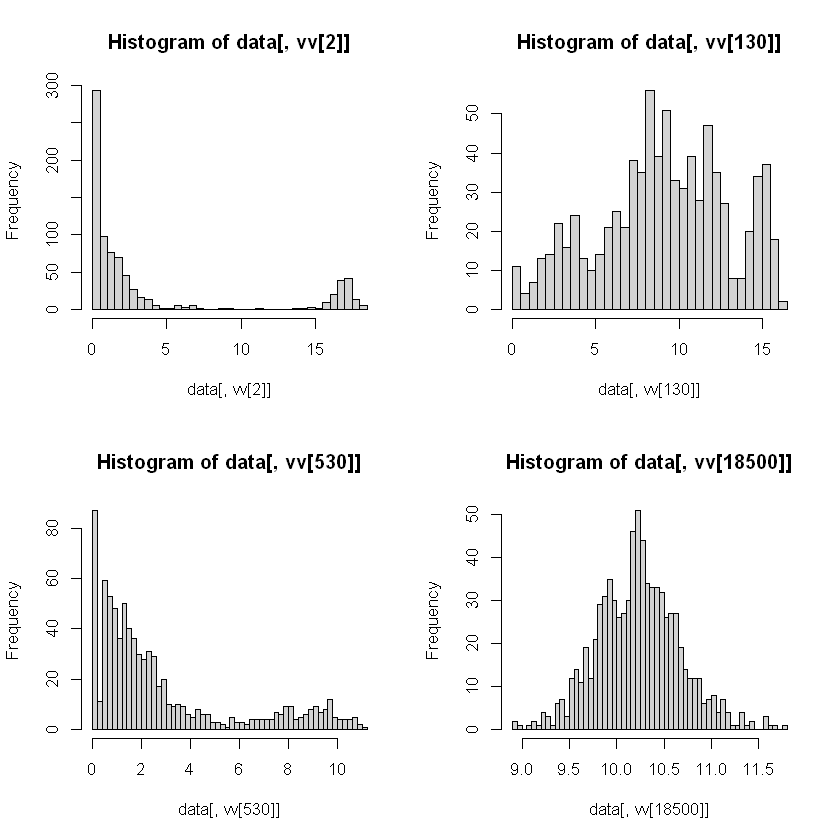

In [3]:
# Use Rebeckas method to sort the features by variance 
#load("data.csv")

# Compute sd of each gene:
vv <- apply(data, 2, sd)

# Sort from highest to lowest sd:
vv<- rev(sort.list(vv))

# Seems to be easier to work with dataframe than tibble
data <- as.data.frame(data)

# some examples of filtered features
par(mfrow=c(2,2))
hist(data[,vv[2]],50)
hist(data[,vv[130]],50)
hist(data[,vv[530]],50)
hist(data[,vv[18500]],50)

# Select the 5000 genes with highest sd
guse <- vv[1:5000]
X <- data[,guse]

comp 1   comp 2   comp 3   comp 4   comp 5   comp 6 
773.2483 567.2364 462.7877 359.2770 163.2589 137.5581

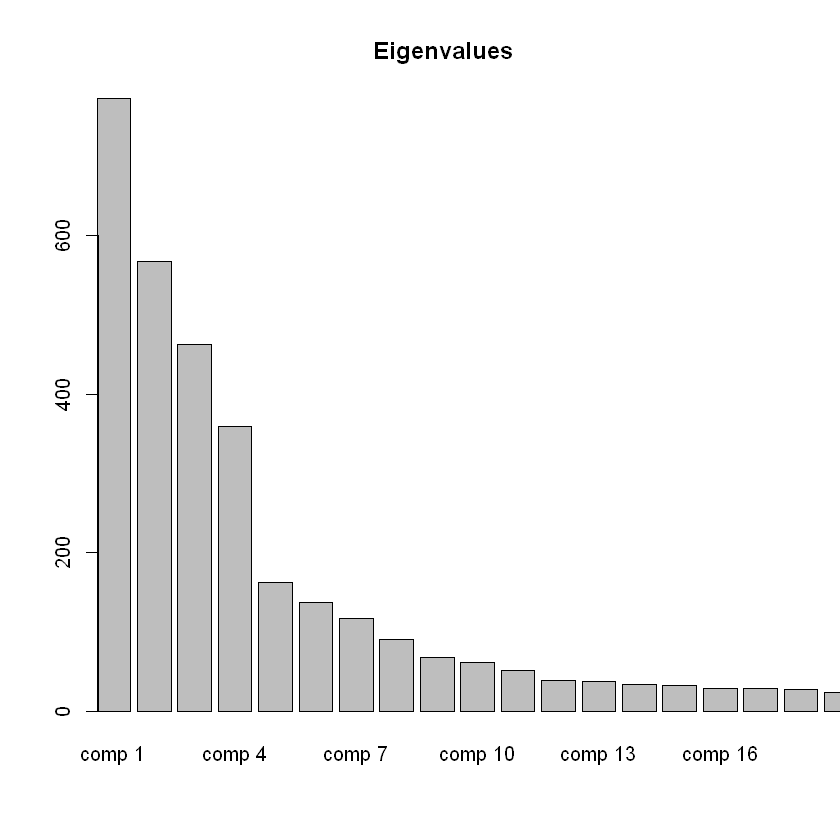

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,773.24833,15.4649666,15.46497
Dim.2,567.23641,11.3447283,26.80969
Dim.3,462.78769,9.2557538,36.06545
Dim.4,359.27702,7.1855405,43.25099
Dim.5,163.25895,3.2651789,46.51617
Dim.6,137.55812,2.7511623,49.26733
Dim.7,117.23799,2.3447598,51.61209
Dim.8,90.68758,1.8137515,53.42584
Dim.9,67.48587,1.3497173,54.77556
Dim.10,62.31319,1.2462639,56.02182


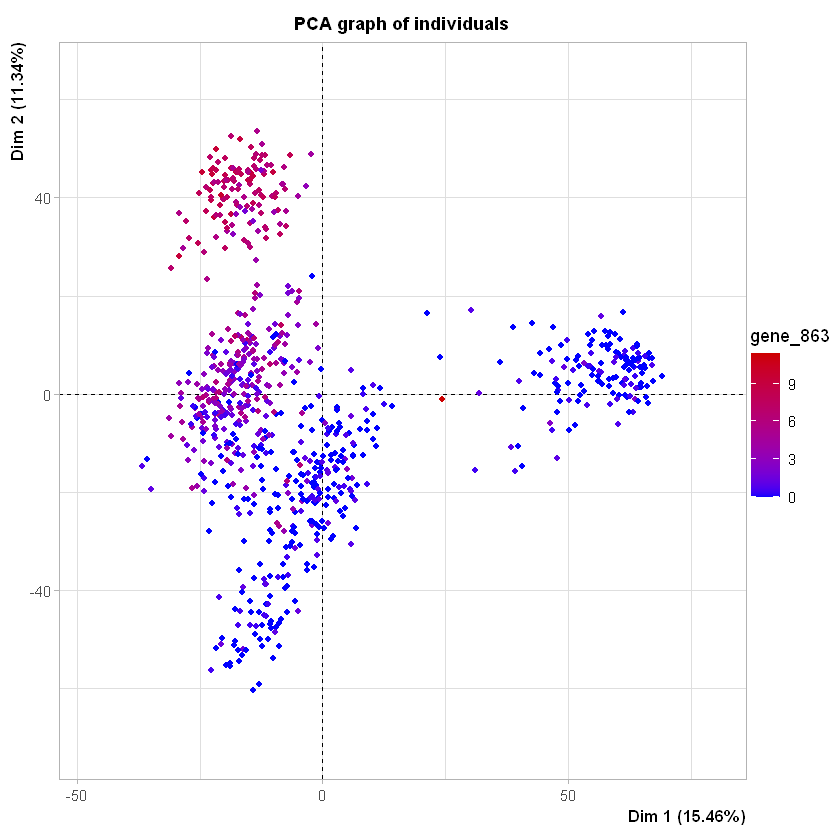

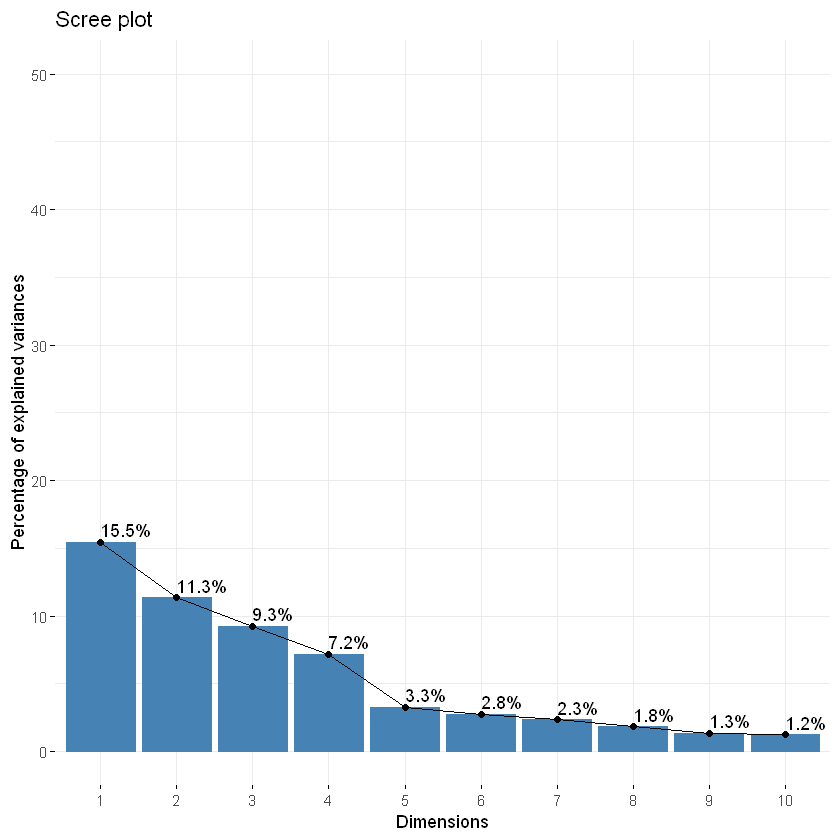

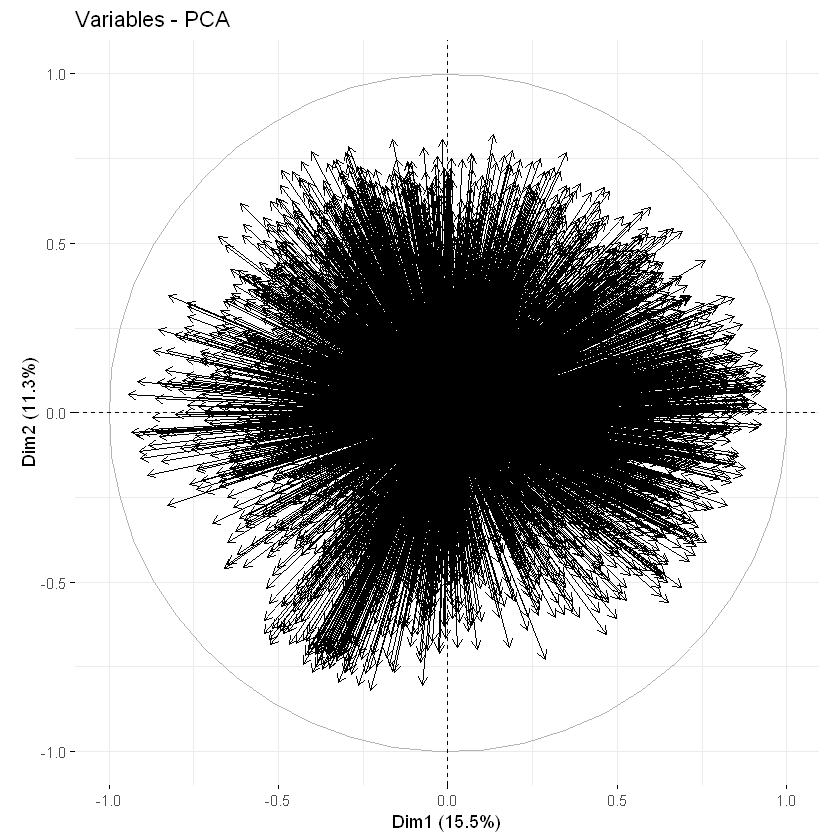

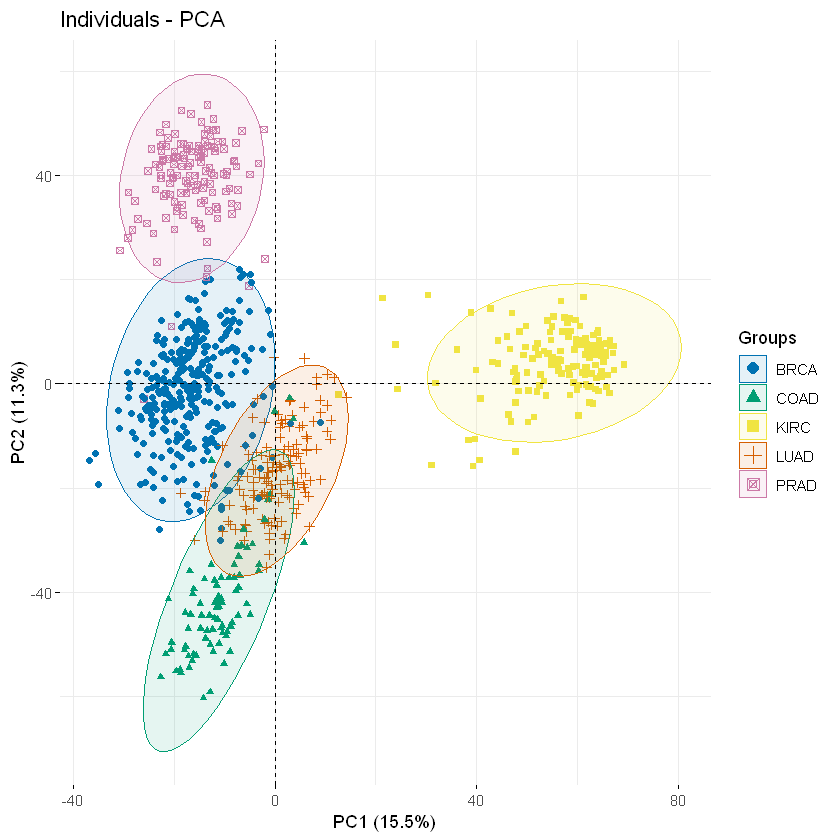

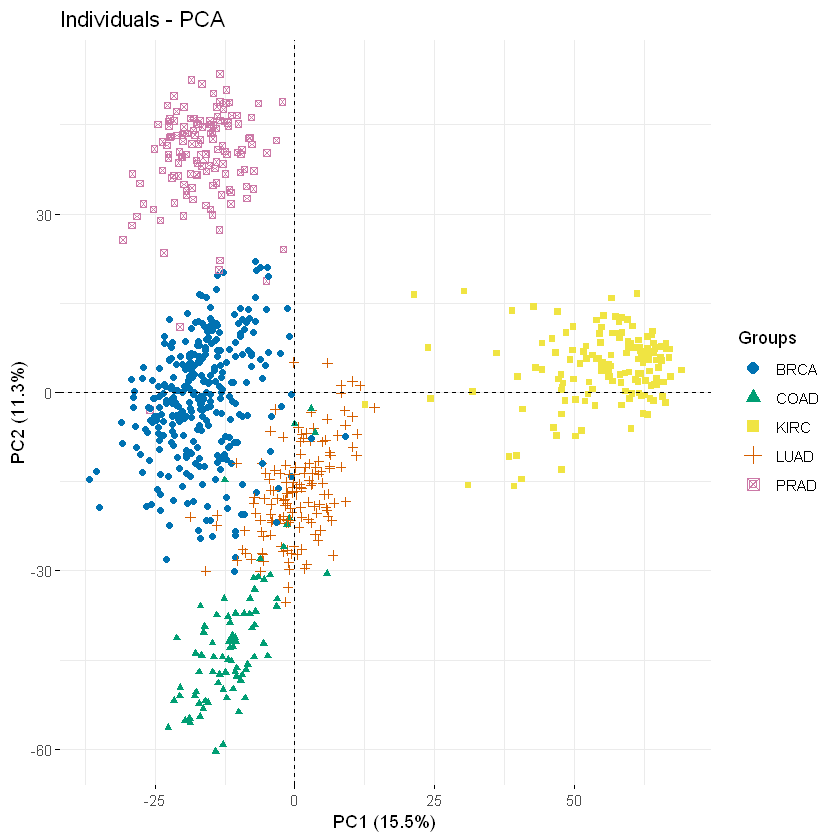

In [8]:
## PCA analysis

# library(FactoMineR)

# X <- data[,guse]


res.pca <- PCA(X, scale.unit = TRUE, ncp = 5, graph = FALSE)

head(res.pca$eig[,1])

barplot(res.pca$eig[,1], 
        main = "Eigenvalues",
        xlim = c(1,20))
        #names.arg = 1:nrow(res.pca$eig))
plot(res.pca, 
     choix = "ind",
     habillage = 801,
     label = "none",
     xlab = "PC1 (15.46%)",
     ylab = "PC2 (11.34%)")

# Get eigenvalues using factoextra package
# The eigenvalues measure the amount of variation
# retained by each principal component. 
eig.val <- get_eigenvalue(res.pca)
eig.val

# Eigenvalues are large for the first pc and small for the latter (because
# the first components are the directions containing the most of the datasets 
# variation)


# Scree plot using factoextra package
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0,50))

# From this plot we see that we might want to stop at the 10th principal
# component, as more than 50% of variation is explained by these components. 

# Graph of variables - REALLY UGLY!!
vari <- get_pca_var(res.pca)

# To plot variables:
fviz_pca_var(res.pca, col.var = "black", label = "none")

# Colour by groups
# Create a grouping variable using kmeans
# Trying 5 centers
set.seed(123)
res.km <- kmeans(vari$coord, centers = 5, nstart = 25)
grp <- as.factor(res.km$cluster)

#colour variables by groups (from labels)

# Add labels to data
data_newest <- cbind(labels, data)

# Factorise categorical data (to be able to use col.ind)
C <- as.factor(data_newest$Class)

# Get individuals
ind <- get_pca_ind(res.pca)

# Plot individuals grouped by colour
fviz_pca_ind(res.pca, 
             geom.ind = "point",
             col.ind = C,
             palette = c(cbPalette[6],
                         cbPalette[4],
                         cbPalette[5],
                         cbPalette[7],
                         cbPalette[8]),
             addEllipses = TRUE,
             legend.title = "Groups",
             xlab = "PC1 (15.5%)",
             ylab = "PC2 (11.3%)")

# Without ellipses 
fviz_pca_ind(res.pca, 
             geom.ind = "point",
             col.ind = C,
             palette = c(cbPalette[6],
                         cbPalette[4],
                         cbPalette[5],
                         cbPalette[7],
                         cbPalette[8]),
             addEllipses = FALSE,
             legend.title = "Groups",
             xlab = "PC1 (15.5%)",
             ylab = "PC2 (11.3%)")

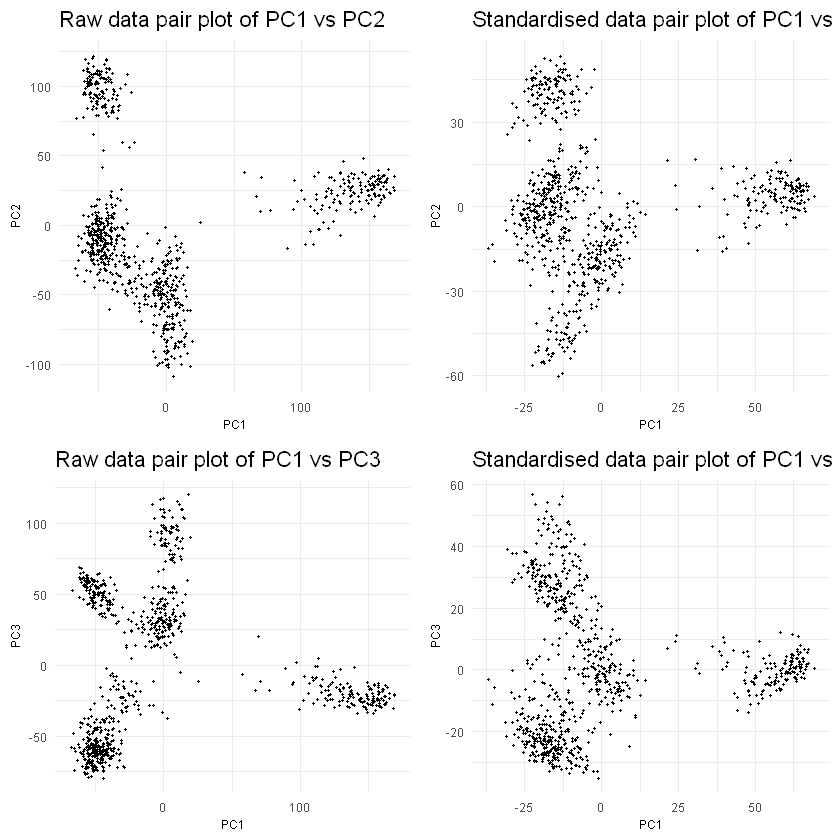

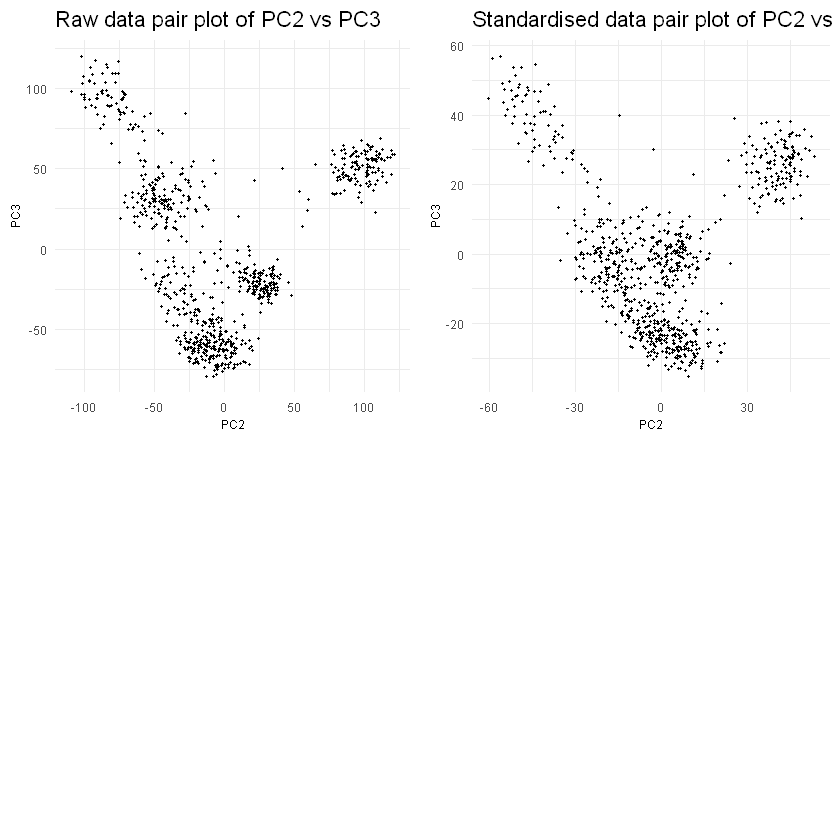

In [41]:
# Using my old code IG

## ---- TASK 3 -----------------------------------------------------------------
## ---- PCA --------------------------------------------------------------------

    # Calculate PCA for raw data and standardised data (using code from canvas L5)
    # Data is centred so that SVD can be utilised

    # Compute singular-value decomposition for the raw data (not scaled)
    X_svd_raw <- svd(scale(as.matrix(X), scale = FALSE))

    # Compute singular-value decomposition for the standardised data (scaled)
    X_svd_std <- svd(scale(as.matrix(X)))

    # Compute the principal components for the raw data
    X_proj_raw <- scale(as.matrix(X), scale = FALSE) %*%
      X_svd_raw$v


    # Compute the principal components for the standardised data
    X_proj_std <- scale(as.matrix(X)) %*% X_svd_std$v

    # Create tibble with first three pc for raw data
    filtered_hv_proj_raw <- tibble(
      PC1 = X_proj_raw[,1],
      PC2 = X_proj_raw[,2],
      PC3 = X_proj_raw[,3])

    # Create tibble with first three pc for standardised data
    filtered_hv_proj_std <- tibble(
      PC1 = X_proj_std[,1],
      PC2 = X_proj_std[,2],
      PC3 = X_proj_std[,3])

    # Plot pc1 vs pc2 raw
    p3 <- ggplot(filtered_hv_proj_raw) +
      geom_point(aes(x = PC1, y = PC2), size = 0.6) +
      scale_colour_manual(values = cbPalette[-1], guide = "none") +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 7),
        axis.text = element_text(size = 7)) +
      ggtitle("Raw data pair plot of PC1 vs PC2")

    # Plot pc1 vs pc2 standardised
    p4 <- ggplot(filtered_hv_proj_std) +
      geom_point(aes(x = PC1, y = PC2), size = 0.6) +
      scale_colour_manual(values = cbPalette[-1], guide = "none") +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 7),
        axis.text = element_text(size = 7)) +
      ggtitle("Standardised data pair plot of PC1 vs PC2")

    # Plot pc1 vs pc3 raw
    p5 <- ggplot(filtered_hv_proj_raw) +
      geom_point(aes(x = PC1, y = PC3), size = 0.6) +
      scale_colour_manual(values = cbPalette[-1], guide = "none") +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 7),
        axis.text = element_text(size = 7)) +
      ggtitle("Raw data pair plot of PC1 vs PC3")

    # Plot pc1 vs pc3 standardised
    p6 <- ggplot(filtered_hv_proj_std) +
      geom_point(aes(x = PC1, y = PC3), size = 0.6) +
      scale_colour_manual(values = cbPalette[-1], guide = "none") +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 7),
        axis.text = element_text(size = 7)) +
      ggtitle("Standardised data pair plot of PC1 vs PC3") 


    # Arrange multiple ggplots on the same page:
    ggpubr::ggarrange(
      p3, p4, p5, p6, ncol = 2, nrow = 2, heights = c(1.1, 1))

    # Plot pc3 vs pc2 raw
    p7 <- ggplot(filtered_hv_proj_raw) +
      geom_point(aes(x = PC2, y = PC3), size = 0.6) +
      scale_colour_manual(values = cbPalette[-1], guide = "none") +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 7),
        axis.text = element_text(size = 7)) +
      ggtitle("Raw data pair plot of PC2 vs PC3")

    # Plot pc3 vs pc2 raw
    p8 <- ggplot(filtered_hv_proj_std) +
      geom_point(aes(x = PC2, y = PC3), size = 0.6) +
      scale_colour_manual(values = cbPalette[-1], guide = "none") +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 7),
        axis.text = element_text(size = 7)) +
      ggtitle("Standardised data pair plot of PC2 vs PC3") 


    # Arrange multiple ggplots on the same page:
    ggpubr::ggarrange(
      p7, p8, ncol = 2, nrow = 2, heights = c(1.1, 1))


,gene_9176,gene_9175,gene_15898,gene_15301,gene_15589,gene_3540,gene_19661,gene_3541,gene_11250,gene_15897,...,gene_3937,gene_17815,gene_1949,gene_7907,gene_17868,gene_884,gene_2899,gene_3123,gene_17471,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,18.52516,17.173570,1.3342822,13.61814,0.00000,4.997134,1.094912,5.7883125,18.015981,9.595069,...,6.727662,0.5918709,5.5278492,1.3342822,1.8220367,0.5918709,8.766969,4.852678,10.60075,4
2,0.00000,0.000000,13.6092134,0.00000,0.00000,6.736605,11.169775,13.0595135,1.004394,14.001091,...,8.291834,0.0000000,3.4674099,3.3298268,1.5908176,0.5878450,8.010148,1.813607,11.46435,5
3,16.05360,14.818422,1.0741629,12.75998,0.00000,7.009739,0.000000,5.1553607,7.799819,8.172052,...,3.718120,0.0000000,3.1869600,0.7965978,0.4525954,0.0000000,6.748126,2.228018,7.49845,4
4,18.37179,17.371079,0.4348817,12.35328,0.00000,5.445151,1.031960,5.9833767,11.913121,11.765829,...,6.984008,0.0000000,4.5337378,1.7918141,0.4348817,0.0000000,7.582481,3.239245,10.29806,4
5,0.00000,1.580097,1.0956544,0.00000,14.97592,8.077916,12.783131,8.3496484,1.095654,4.603502,...,7.189617,0.3609822,2.9676298,0.6493855,3.7857912,0.0000000,8.343346,3.019133,12.15262,3
6,17.39808,16.064835,0.8942939,13.86901,0.00000,0.000000,0.000000,0.5154097,10.034331,10.286766,...,7.053285,0.0000000,0.8942939,3.3243354,2.2822322,0.5154097,8.630991,4.375109,11.71127,4


[1]  77 145 303 136 140

,gene_9176,gene_9175,gene_15898,gene_15301,gene_15589,gene_3540,gene_19661,gene_3541,gene_11250,gene_15897,...,gene_16090,gene_3937,gene_17815,gene_1949,gene_7907,gene_17868,gene_884,gene_2899,gene_3123,gene_17471
1,2.7546774,1.0211355,1.3831338,6.5362277,0.04800526,16.2736389,5.910995,14.5174531,0.5440811,4.3468497,...,2.051100,5.637905,0.2103468,2.394894,1.355383,1.443231,4.0581252,7.407805,2.754615,11.16193
2,0.3542791,0.3210996,1.0408550,8.1799519,0.56178727,0.6072168,6.247888,0.8244664,0.3176860,0.9496197,...,1.455569,7.907839,0.7447106,1.297553,3.941297,2.293859,0.2778931,10.931945,3.046693,10.86130
3,1.2743731,1.6221667,1.1262767,0.4928522,9.77753372,6.6992794,12.154119,8.9625535,4.3634143,2.8941712,...,1.694403,7.594756,1.4961881,3.056753,2.778015,3.482445,0.2600470,8.923537,2.873321,11.98782
4,18.2374070,16.7529945,0.7426949,12.7480186,0.16783677,4.4154318,1.319845,5.3490382,13.6414538,9.6198392,...,2.853116,6.645292,0.2865358,4.128916,2.316699,1.246467,0.2531104,8.200257,3.774418,10.70952
5,0.2245841,0.8997608,15.7196500,5.9862810,0.08914264,12.2715455,7.233032,14.3496960,5.9183689,13.7029582,...,3.382533,8.579133,0.5507237,4.000193,3.805911,2.535407,0.7260067,9.000687,4.633258,11.26069


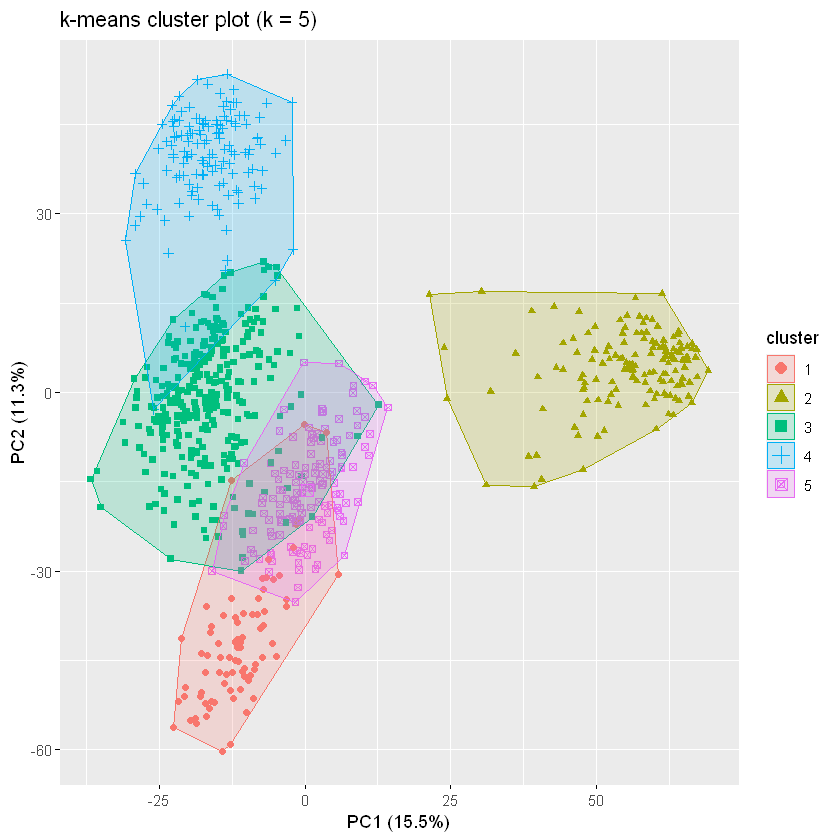

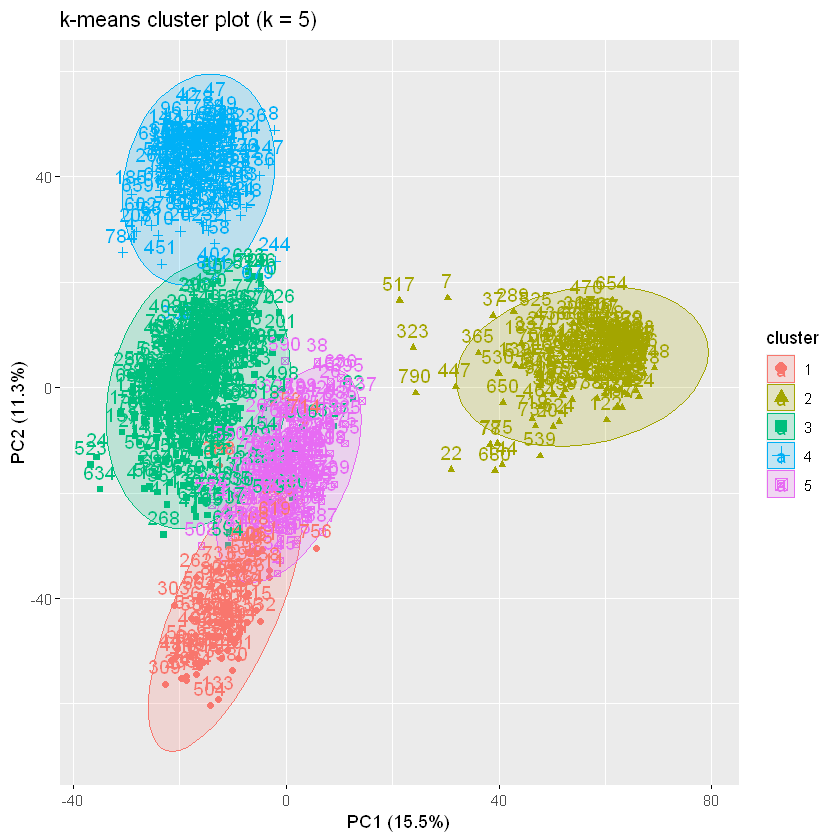

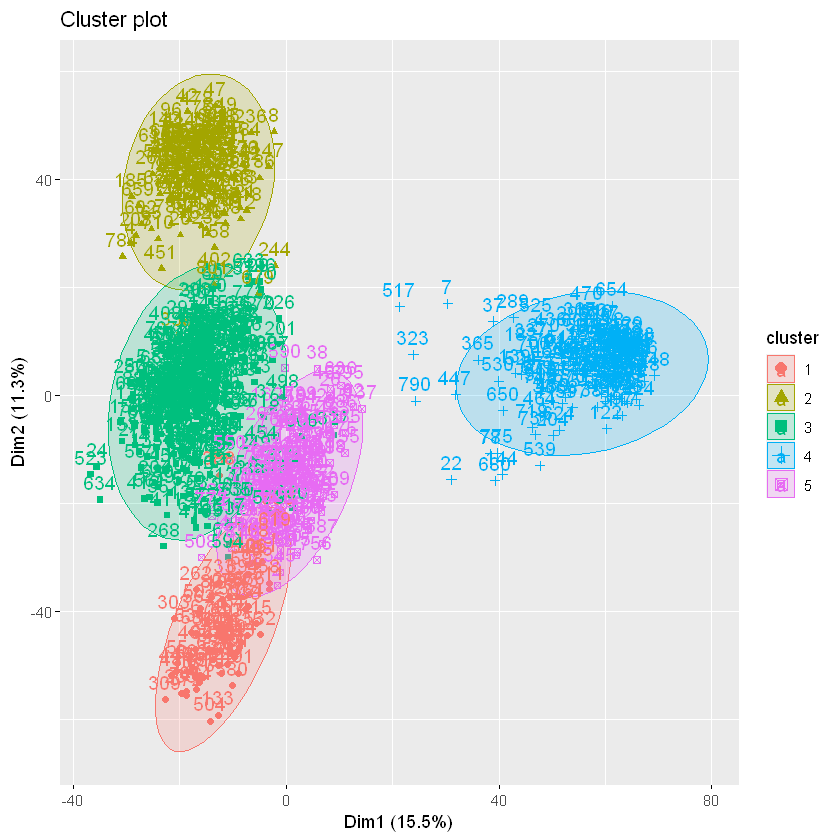

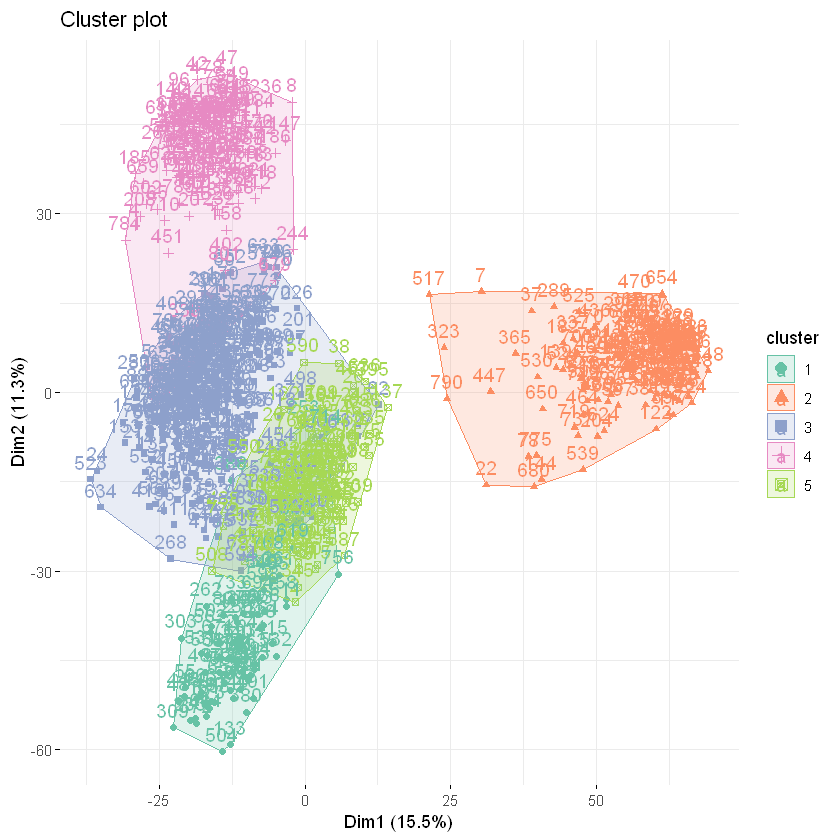

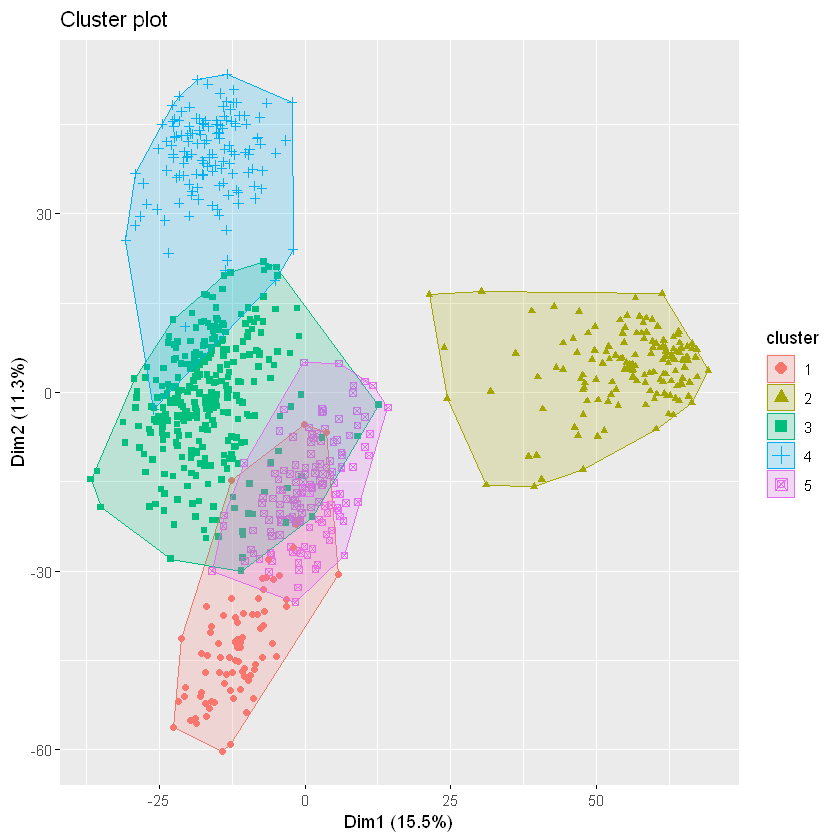

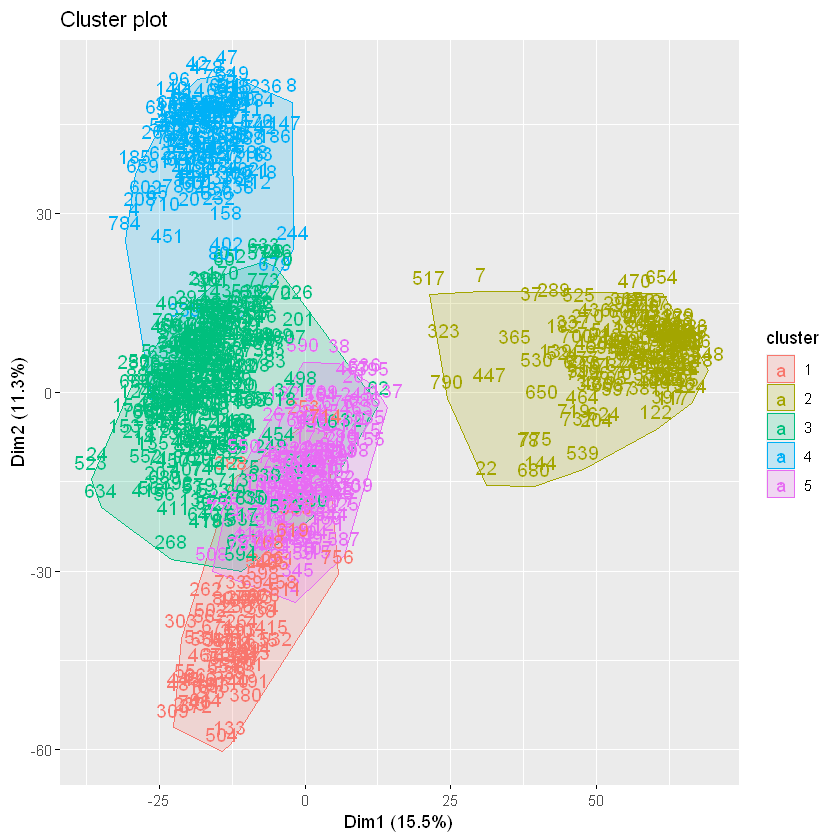

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


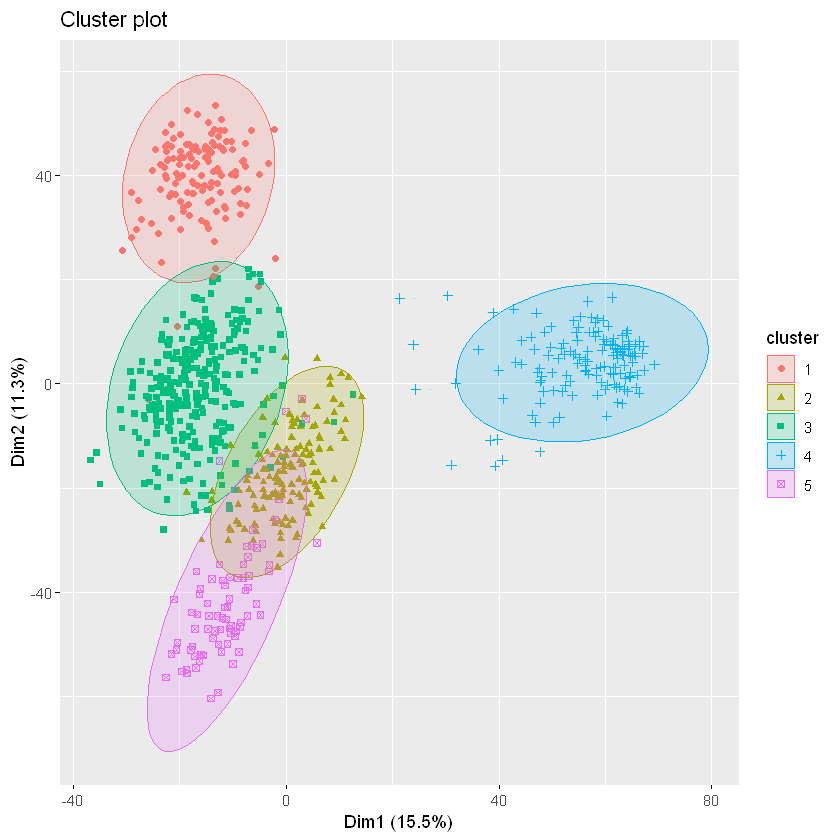

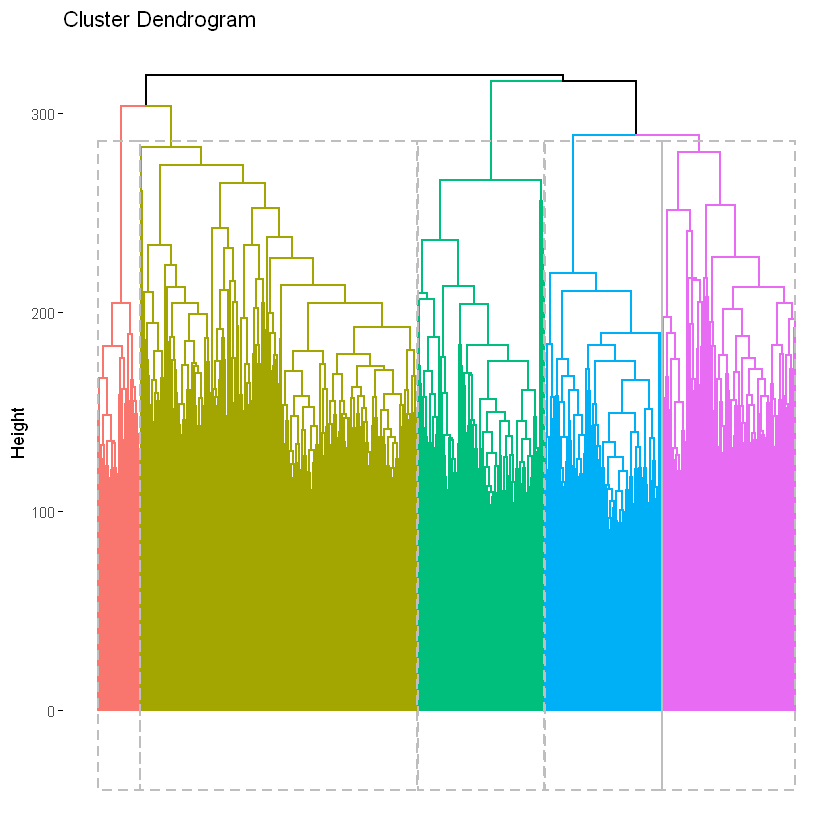

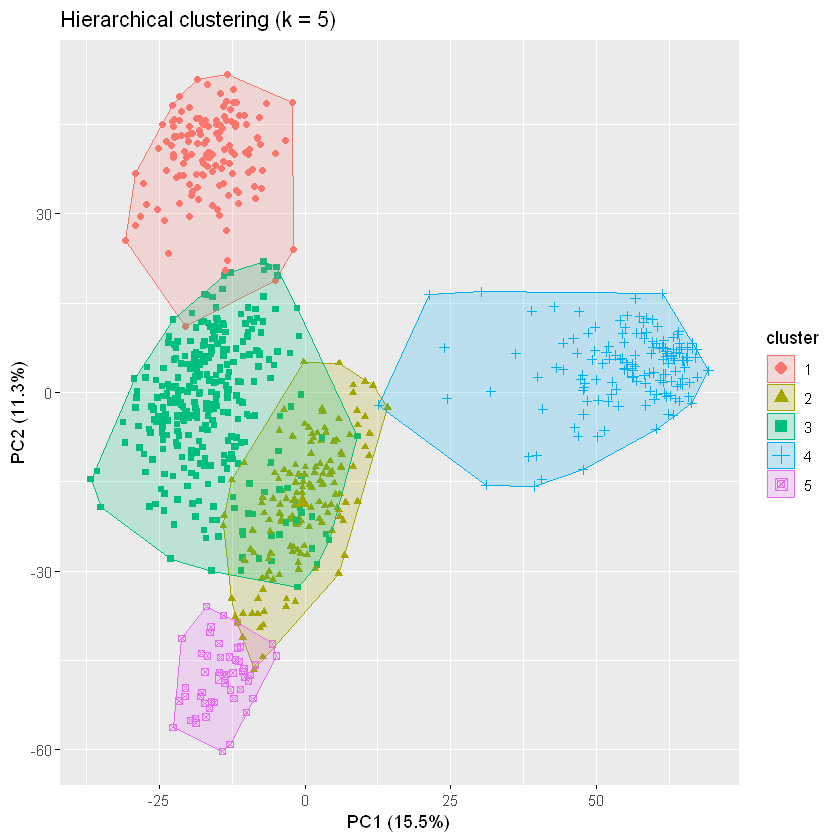

In [43]:

  
  ## ---- K-means --------------------------------------------------------------
  
  # From http://varianceexplained.org/r/kmeans-free-lunch/
  # K-means is a widely used method in cluster analysis.
  # This method does NOT require ANY assumptions
  # i.e. given a data set and a pre-specified number of clusters,k,
  # you can just apply this algorithm which minimise the SSE, 
  # SSE = within cluster square error
  
  # K-means is therefore essentially an optimisation problem. 
  
  # Drawbacks: 
  # k-means assume:
  # 1. The variance of the distribution of each attribute
  # (variable) is spherical;
  
  # 2. All variables has the same variancec;
  
  # 3. The prior probability of all k clusters are the same, 
  # i.e. each cluster has roughly equal number of observations;
  
  # If any of these 3 assumptions is violated, then it means k-means
  # will fail. 
  
  ## INTERNET 
  # - https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/
  
  # Compute k-means with k = 5
  set.seed(123)
  km.res <- kmeans(X, 5, nstart = 25)
  
  # nstart = 25 means that R will try 25 different random starting assignments
  # and then select the best results corresponding to the one with the lowest 
  # within cluster variation.
  # Default nstart value is 1, but strongly recommended to compute
  # k-means clustering with a large value of nstart such as 25 or 50 
  # in order to have more stable results.
  
  # print the results:
  #print(km.res)
  
  # Displays: the cluster means or centers: 
  # a matrix, which rows are cluster numbers and columns are variables
  # the clustering vector: A vector of integers (from 1:k) indicating the
  # the cluster to which point is allocated. 
  
  # It is possible to compute the mean of each variables by clusters using the 
  # original data:
  cluster_means <- aggregate(X, by = list(cluster = km.res$cluster),mean)
  
  
  # If you want to add point classifications to the original data:
  dd <- cbind(X, cluster = km.res$cluster)
  head(dd)
  
  # Cluster size:
  km.res$size
  
  # Cluster means:
  km.res$centers
  
  
  # Visualisation
  # Reduce dimensions by PCA and plot data according to the first 
  # two principal component coordinates.
  
  # The function fviz_cluster() can be used to easily visualise k-means clusters.
  # It takes k-means results and the original data as arguments.
  # In the resulting plot, observations are represented by points, using 
  # principal components if the number of variables are greater than 2. 
  
  # Also possible to draw concentration ellipse around each cluster. 
  
  # All the fviz_code below is taken from the side:
  # https://rpkgs.datanovia.com/factoextra/reference/fviz_cluster.html
  
  # With only points:
  fviz_cluster(km.res, X, 
               ellipse.type = "convex",
               geom = "point",
               main = "k-means cluster plot (k = 5)",
               xlab = "PC1 (15.5%)",
               ylab = "PC2 (11.3%)")
  
  # With points and text (default):
  fviz_cluster(km.res, X, 
               ellipse.type = "norm",
               geom = c("point","text"),
               main = "k-means cluster plot (k = 5)",
               xlab = "PC1 (15.5%)",
               ylab = "PC2 (11.3%)")
  
  # Use repel = TRUE to avoid overplotting (whatever that is)
  
  # Try on scaled data:
  X.scaled <- scale(X)
  
  km.res.scaled <- kmeans(X.scaled,5,nstart=25)
  
  fviz_cluster(km.res.scaled,X.scaled,ellipse.type = "norm")
  
  # No difference - maybe the data was already scaled heh...
  
  #Change colour palette and theme:
  fviz_cluster(km.res, X, palette = "Set2", ggtheme = theme_minimal())
  
  #if (FALSE) {
    # Show points only
    fviz_cluster(km.res, X, geom = "point")
    # Show text only
    fviz_cluster(km.res, X, geom = "text")
    
    # PAM  clustering
    require(cluster)
    pam.res <- pam(X, 5)
    # Visualise pam clustering
    fviz_cluster(pam.res,geom="point", ellipse.type = "norm")
    
    # Hierarchical clustering
    # Use hcut() which compute hclust and cut the tree
    hc.cut <- hcut(X, k = 5, hc_method = "complete")
    # Visualise dendrogram
    fviz_dend(hc.cut, show_labels = FALSE, rect = TRUE)
    
    # Visualise cluster 
    fviz_cluster(hc.cut, 
                 ellipse.type = "convex",
                 geom = "point",
                 main = "Hierarchical clustering (k = 5)", 
                 xlab = "PC1 (15.5%)",
                 ylab = "PC2 (11.3%)")
  #}
  
  

In [46]:
    ## OBS! For some reason this did not run now. 


  ## ---- Using the ClusterR package -------------------------------------------
  
  # The code here is taken from
  # https://cran.r-project.org/web/packages/ClusterR/vignettes/the_clusterR_package.html
  
  # Gaussian Mixture Models (GMM) are a probabilistic model for representing 
  # normally distributed subpopulations within an overall pop.
  # A gmm is parameterised by two types of values, the mixture component weights
  # and the component means and covariances (for the multivariate case).
  # If the number of components is known, expectation maximisation is the 
  # technique most commonly used to estimate
  
  
  #install.packages("ClusterR")
  library(ClusterR)

  
  
  gmm <- GMM(X, 2, 
             dist_mode = "maha_dist",
             seed_mode = "random_subset",
             km_iter = 10,
             em_iter = 10,
             verbose = F)
  #pr <- predict(gmm, newdata = X)
  
  
  
  opt_gmm <- Optimal_Clusters_GMM(X, 
                                  max_clusters = 10,
                                  criterion = "BIC",
                                  dist_mode = "maha_dist",
                                  seed_mode = "random_subset",
                                  km_iter = 10,
                                  em_iter = 10,
                                  var_floor = 1e-10,
                                  plot_data = T)
  # Model with lowest BIC is preferred. In this case, can see that 5 clusters
  # seem to be preferable. 
  
  
  
  

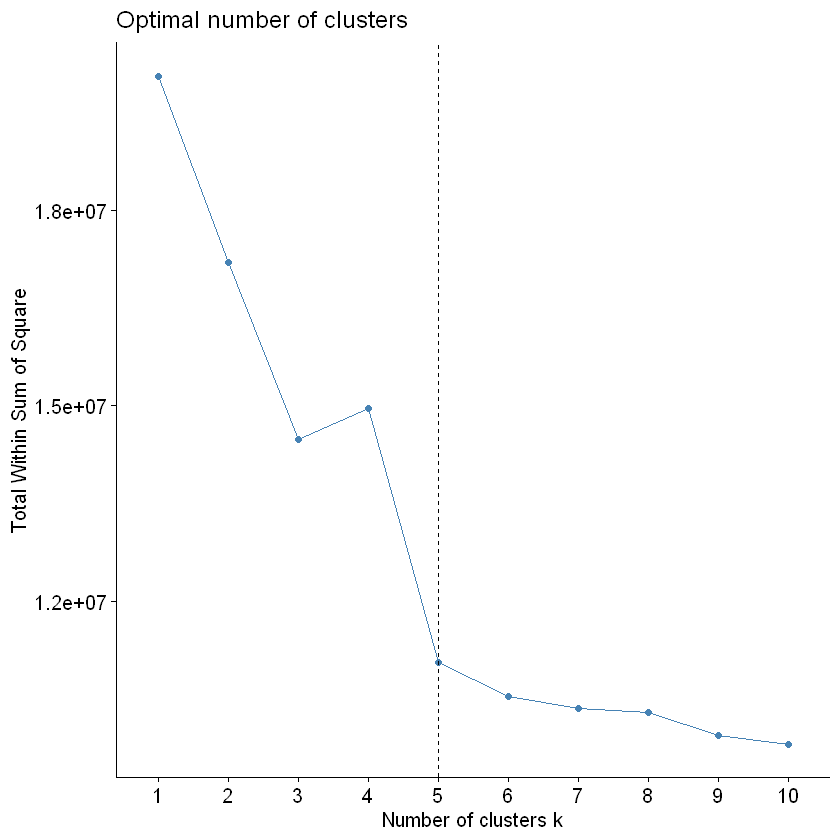

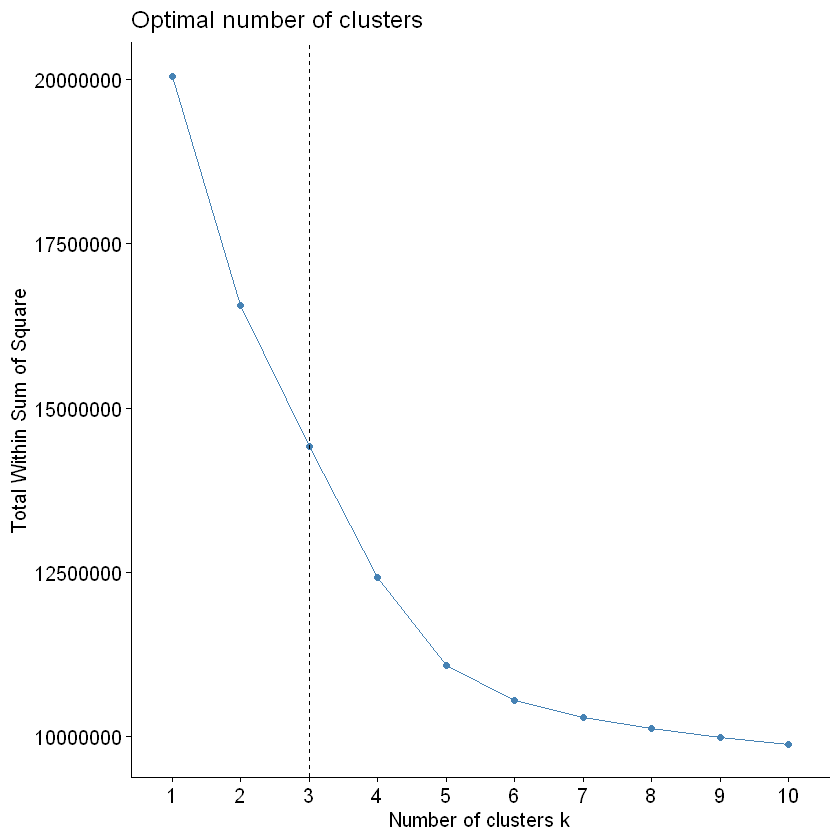

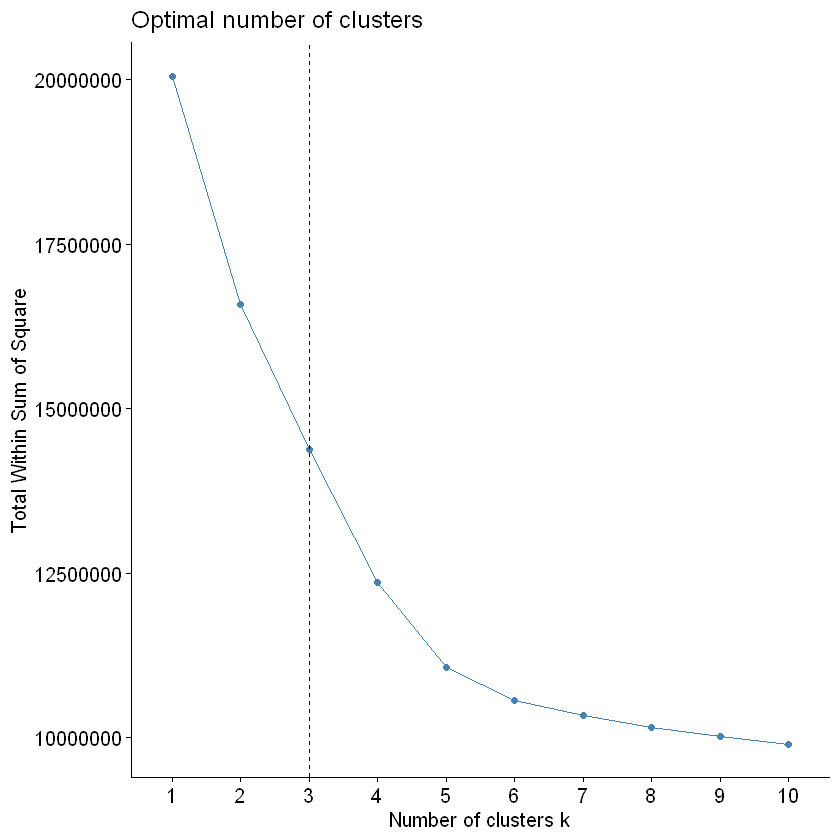

In [4]:
  
## ---- TASK 4 ----------------------------------------------------------------- 
  
  ## ---- Within Cluster Scatter -----------------------------------------------
  
  # Note that I start by assuming that we should expect 5 clusters (for each 
  # cancer type) - however, this is not necessarily true ig
  
  # Simple solution to get k from 
  # https://www.datanovia.com/en/lessons/k-means-clustering-in-r-algorith-and-practical-examples/
   # Idea is to compute k-means clustering using different values of clusters k
  # Next, wss (within sum of squares) is drawn according to the number of clusters
  # The location of a bend (knee) in the plot is generally considered as an 
  # indicator of the appropriate number of clusters
  
  # From https://rpkgs.datanovia.com/factoextra/reference/fviz_nbclust.html
  # fviz_nbclust() determines and visualise the optimale number of clusters using
  # different methods:
  # - Within cluster sum of squares
  # - Average silhouette
  # - gap statistics
  
  # fviz_gap_stat() visulise the gap statistic generated by the function
  # clusGap() (in cluster package)
  # The optimal number of clusters is specified using the "firstmax" method
  
  
  # Optimal number of clusters in the data
  # library(cluster)


  #  X <- data[,guse]
  ## ---- Looking at the knees/ wss --------------------------------------------
  # The lower wss, the better
  # if (FALSE){
  # kmeans:


  # OBS! THIS TAKES A LOT OF TIME TO RUN!!
  fviz_nbclust(X, kmeans, method = "wss") + 
    geom_vline(xintercept = 5, linetype = 2)
  
  # pam:
  fviz_nbclust(X, cluster::pam, method = "wss") + 
    geom_vline(xintercept = 5, linetype = 2)
  
  # hierarchical clustering
  fviz_nbclust(X, hcut, method = "wss") + 
    geom_vline(xintercept = 5, linetype = 2)
  
 # }
  


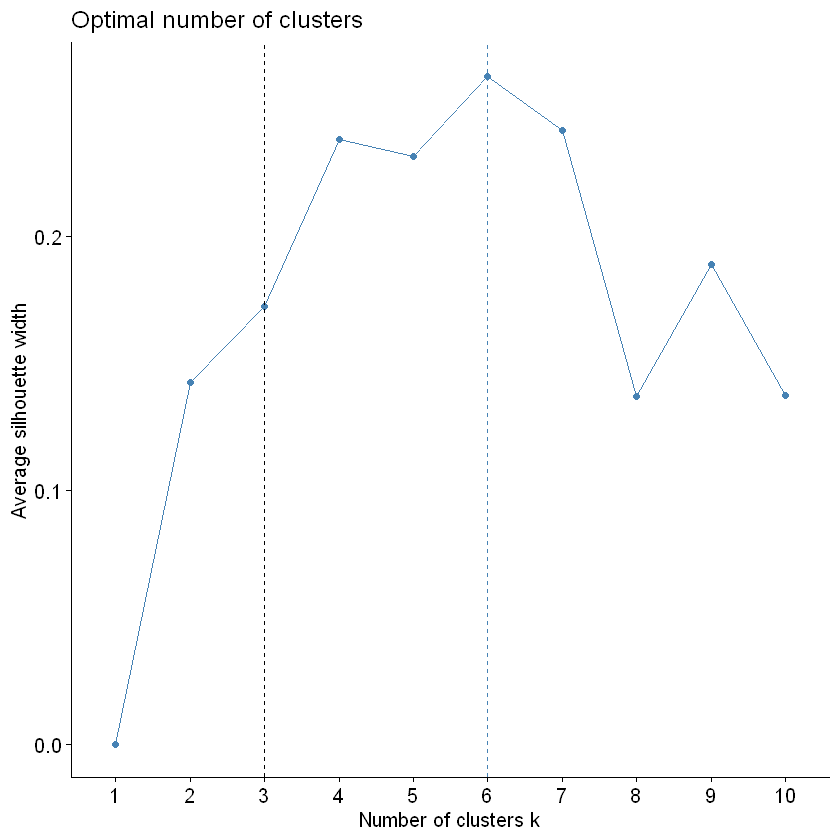

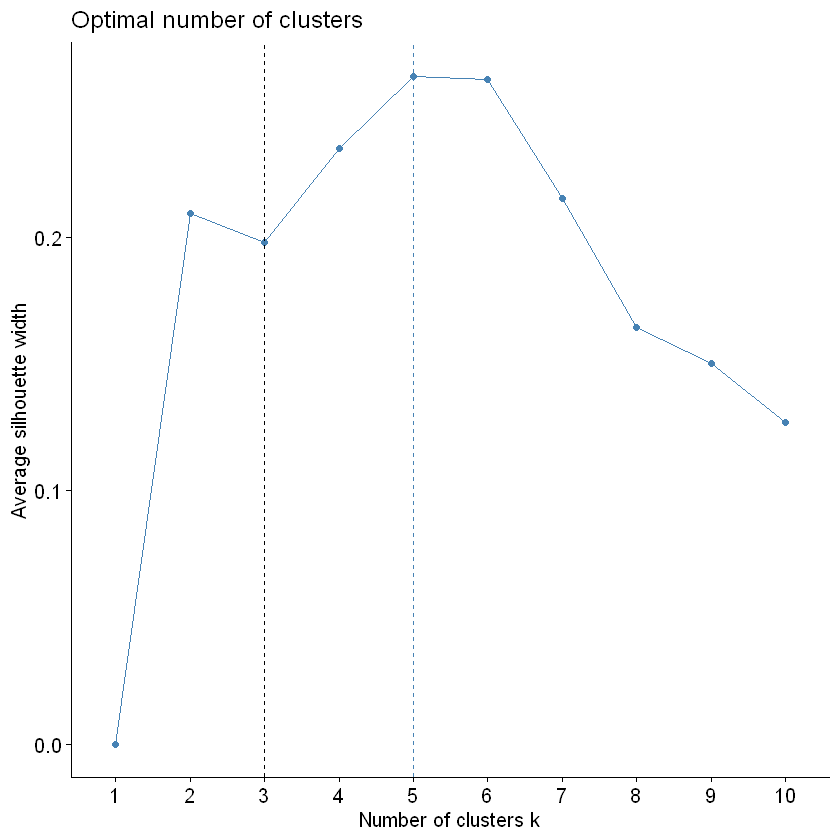

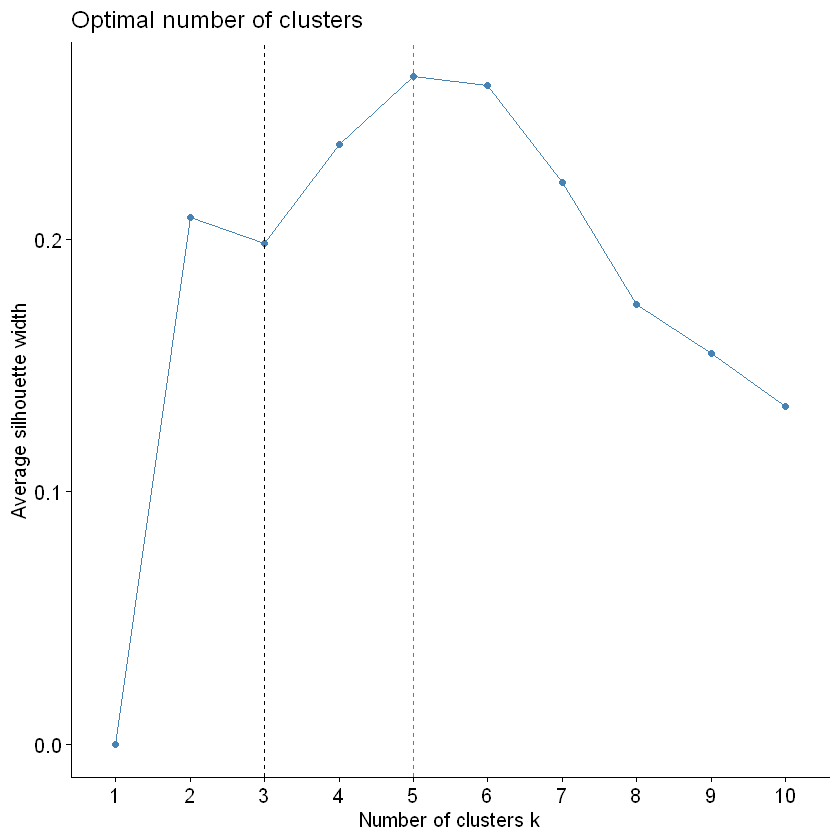

In [35]:
  ## ---- Average Clusters Silhouette ------------------------------------------
  # The higher the better.
  # Average silhouette
  
 # if (FALSE){
    # kmeans:
    fviz_nbclust(X, kmeans, method = "silhouette") + 
      geom_vline(xintercept = 5, linetype = 2)
    
    # pam:
    fviz_nbclust(X, pam, method = "silhouette") + 
      geom_vline(xintercept = 5, linetype = 2)
    
    # hierarchical clustering
    fviz_nbclust(X, hcut, method = "silhouette") + 
      geom_vline(xintercept = 5, linetype = 2)
    
 # }
  
  

In [ ]:
### OBS!  This does not run!
  ## ---- Gap statistic --------------------------------------------------------
  # The higher, the better
  
  set.seed(123)
  # Compute gap statistic for kmeans
  # Recommended B = 500
  gap_stat <- clusGap(X, FUN = kmeans, nstart = 25, K.max = 6, B = 10)
  print(gap_stat, method = "firstmax")
  
  fviz_gap_stat(gap_stat)
  
  # Gap statistic for hierarchical clustering
  gap_stat_hclust <- clusGap(X, FUN = hcut, K.max = 10, B = 10)
  fviz_gap_stat(gap_stat_hclust)

Warning message:
"package 'gplots' was built under R version 4.1.3"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




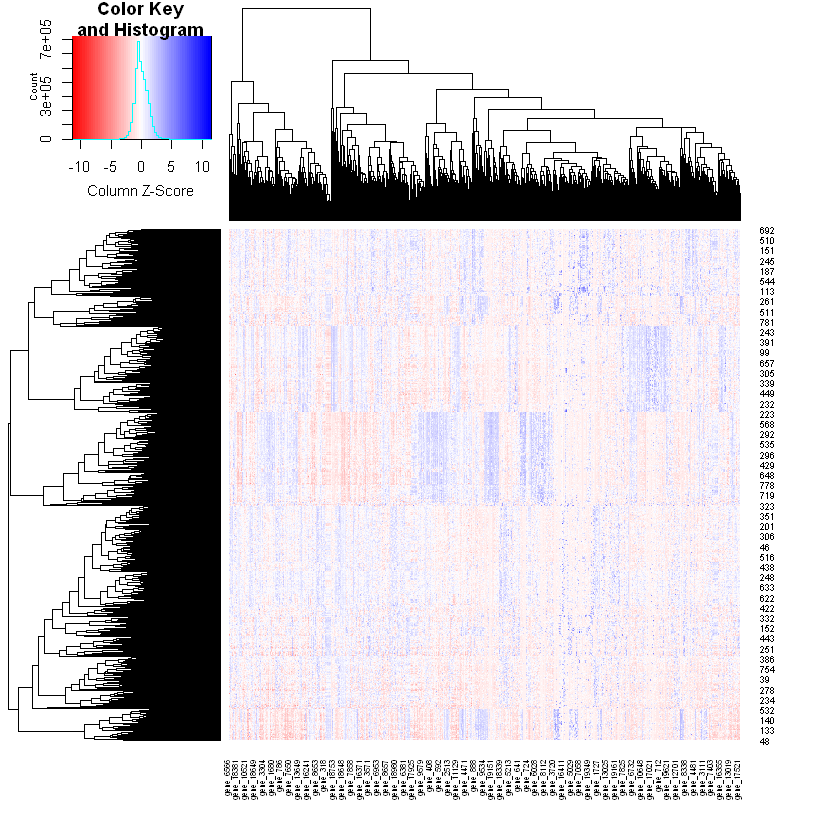

In [4]:
# Heatmaps - note that these look really wonky and the colour thing did not work



# guse<-vv[1:5000]
# use top 5000 genes with highest sd
# library(gplots)
heatmap.2(as.matrix(X),
          col=colorRampPalette(c("red","white","blue"))(64),#RowSideColors = as.character(cols),
          hclust=function(x) hclust(x,method="complete"),scale="column",trace="none")
#euclidean distance
          

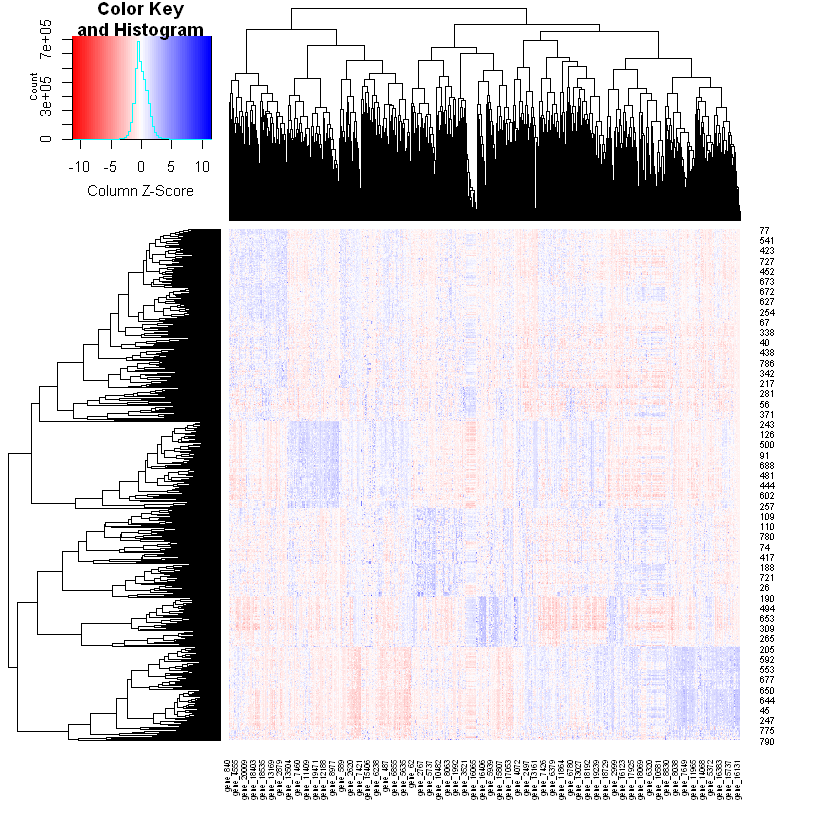

In [9]:
### OBS! Same comment as above - wonky heatmaps

heatmap.2(as.matrix(X),
          col=colorRampPalette(c("red","white","blue"))(64),#RowSideColors = as.character(cols()),
          hclust=function(x) hclust(x,method="complete"),scale="column",trace="none",
          distfun=function(x) as.dist((1-cor(t(x),method="pearson",use="pairwise.complete.obs"))/2))
#correlation 

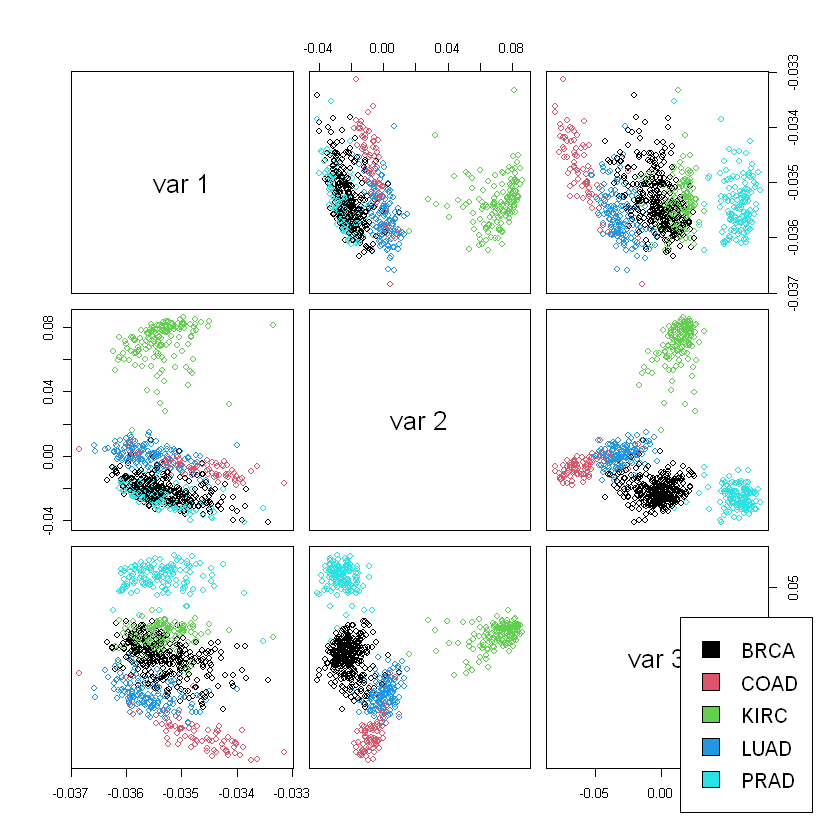

In [5]:
# Investigation of how feature selection may impact clustering

# For some reason it is more useful with matrix than tibble - converted labels to matrix to make it work:
class <- as.matrix(labels)

# Using leading eigenvectors from PCA on top 5000 varying genes. 
ss<-irlba(as.matrix(data),10,10)
pairs(ss$u[,1:3],col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))

Can clearly see some overlap - not obvious groups without the colour ig

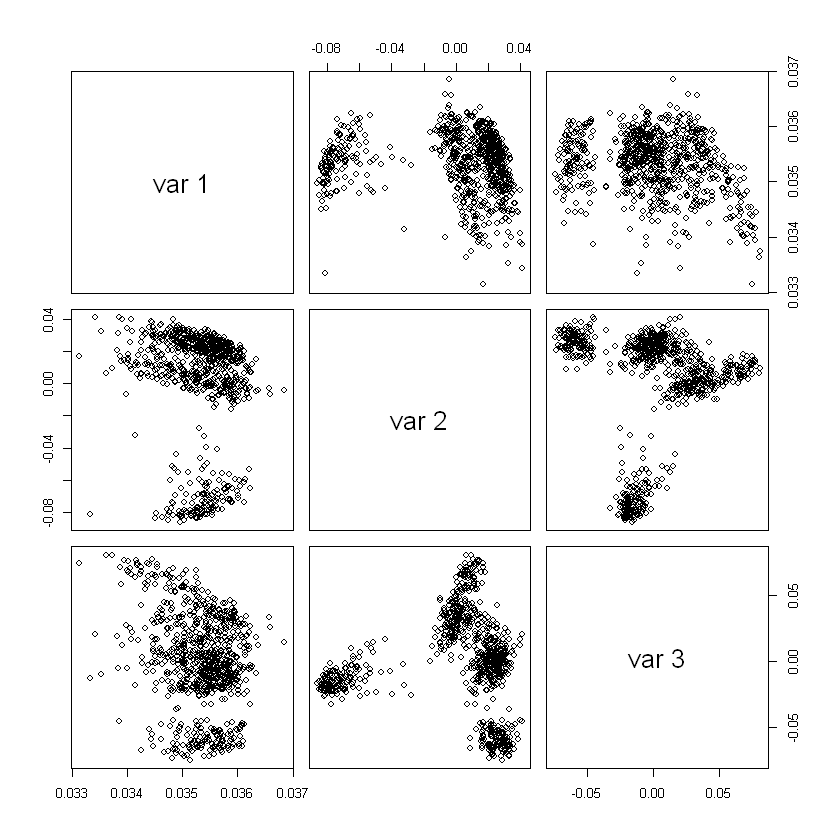

In [10]:
# Without colour
pairs(ss$u[,1:3])

I mean - you can see some grouping but you cannot clearly see separation I would say

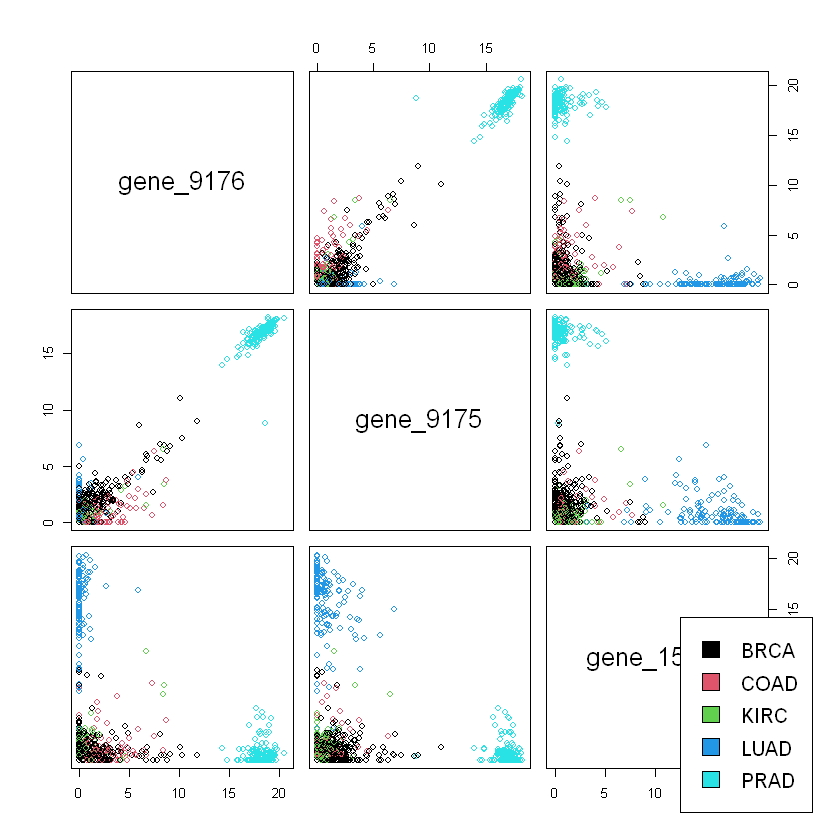

In [11]:
# Now we instead look at the top 3 most varying features to see what separation
# we get:

pairs(as.matrix(data[,vv[1:3]]),col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


Here, PRAD (Prostate) and LUAD (Lung) seems most separated from the rest. Lung cancer is well separated in space spanned by 3rd most varying gene. Prostate seems to be separated well in space spanned by all three most varying genes.

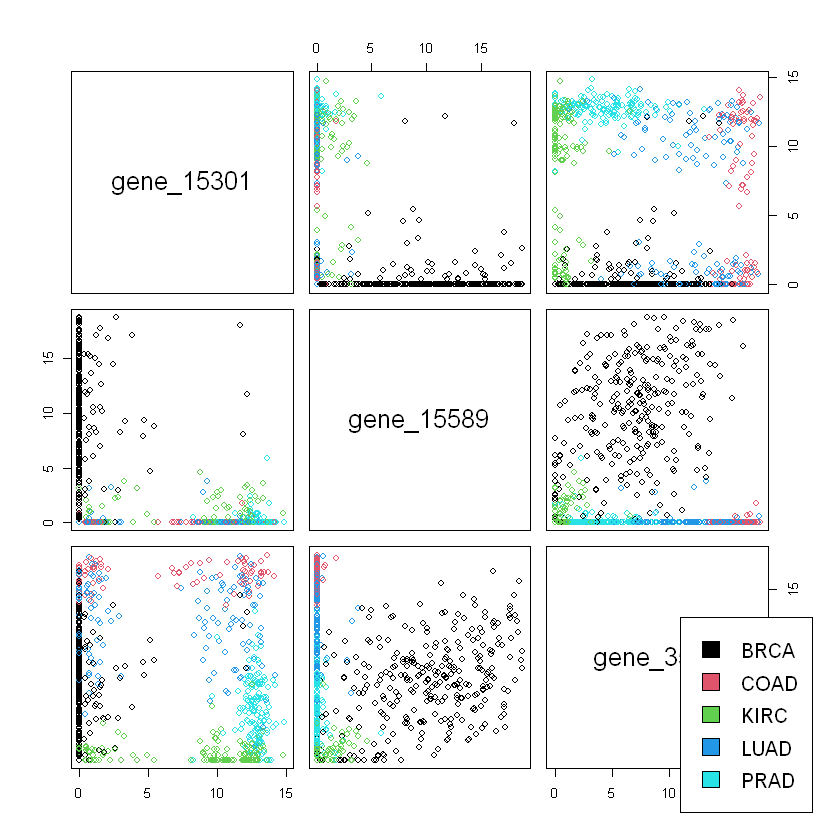

In [12]:
pairs(as.matrix(data[,vv[4:6]]),col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


Here I would say that breast cancer is quite separated in space spanned by 5th and 6th most varying genes. 

Note: The km (kmeans) option only supports a euclidean distance metric when supplying a data matrix.  If you want to cluster a distance matrix, use a different algorithm such as 'hc' or 'pam'.  Changing distance to euclidean

end fraction

clustered

clustered



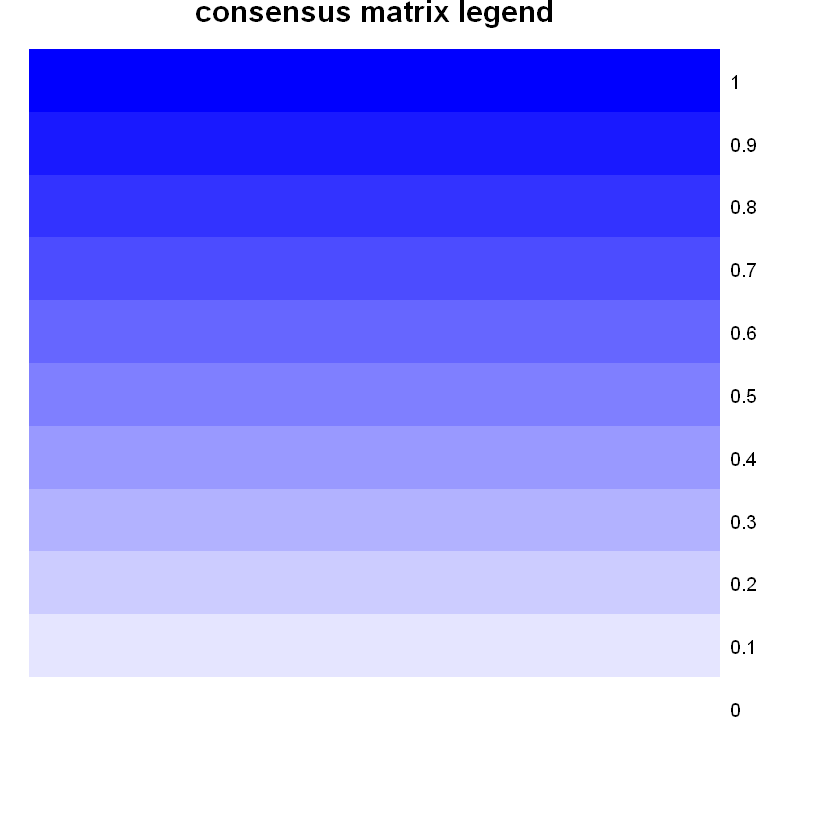

clustered



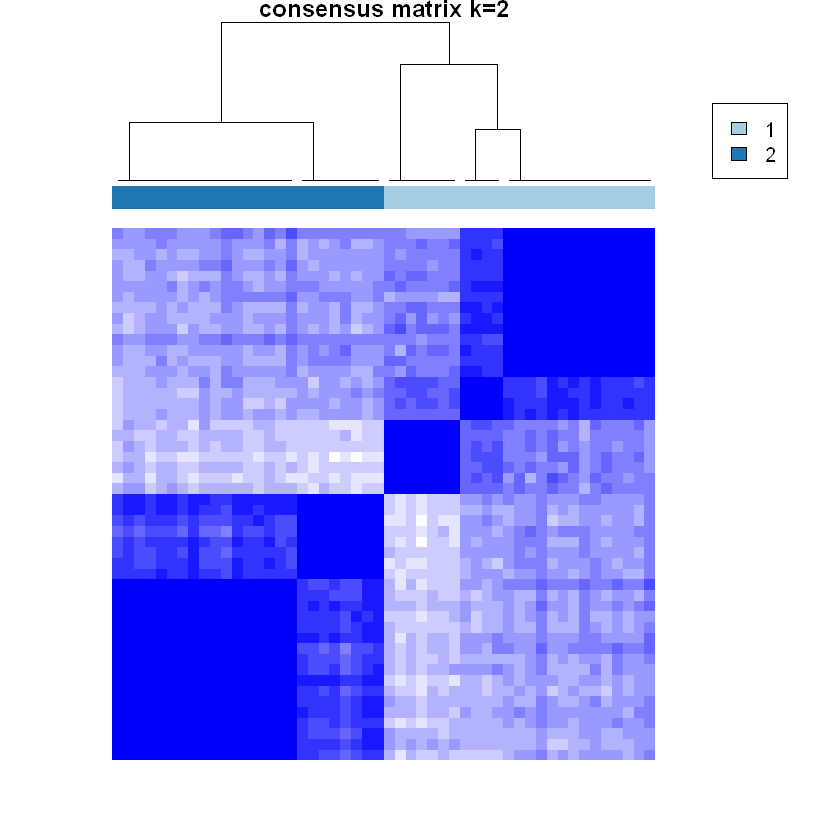

clustered



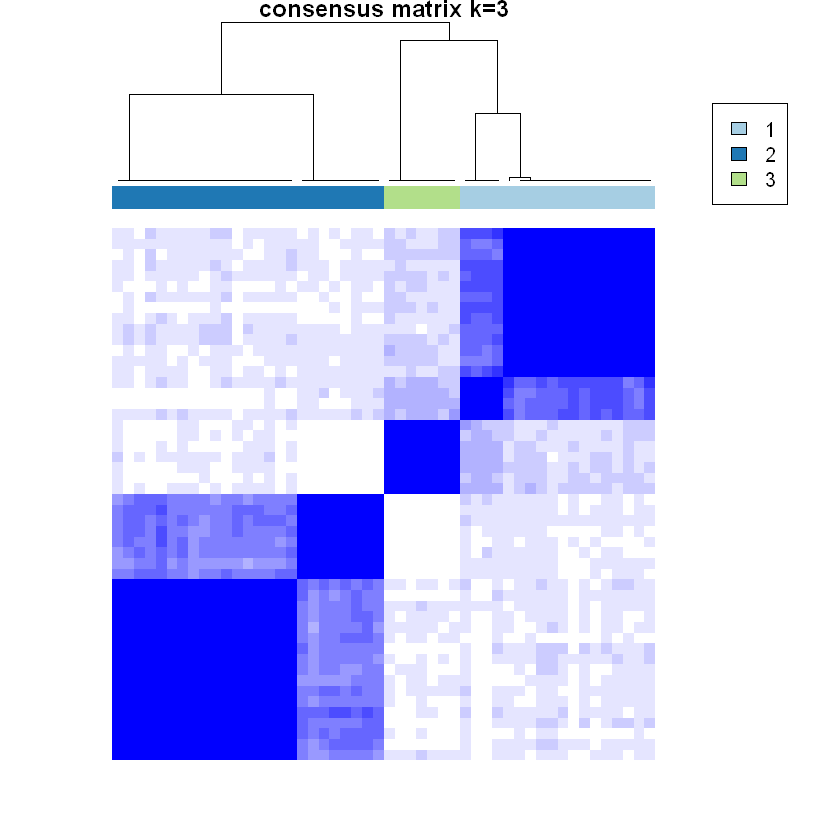

clustered



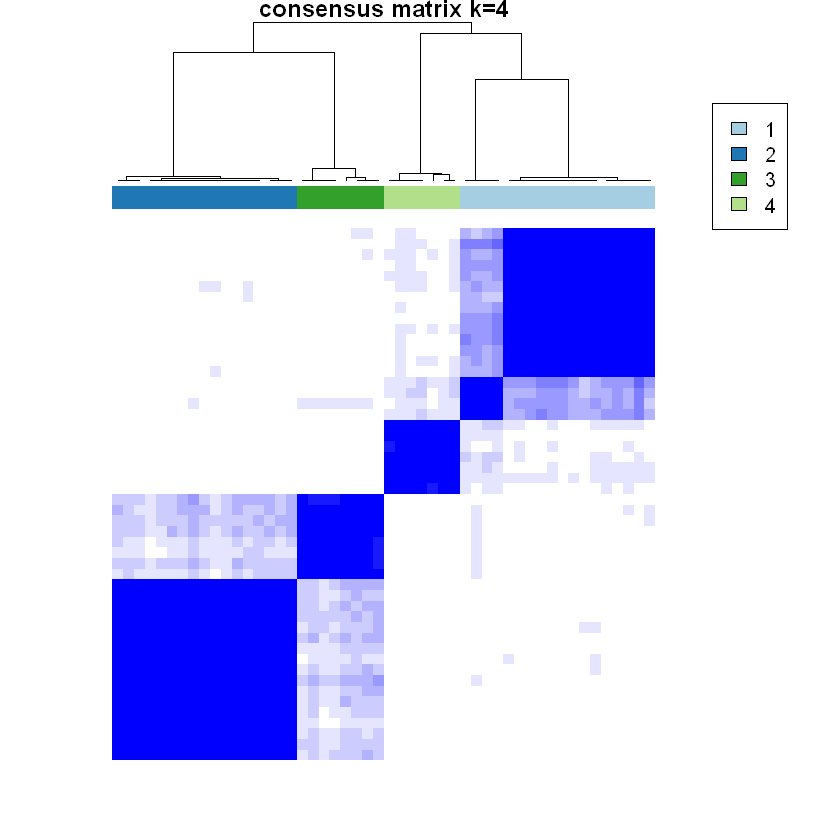

clustered



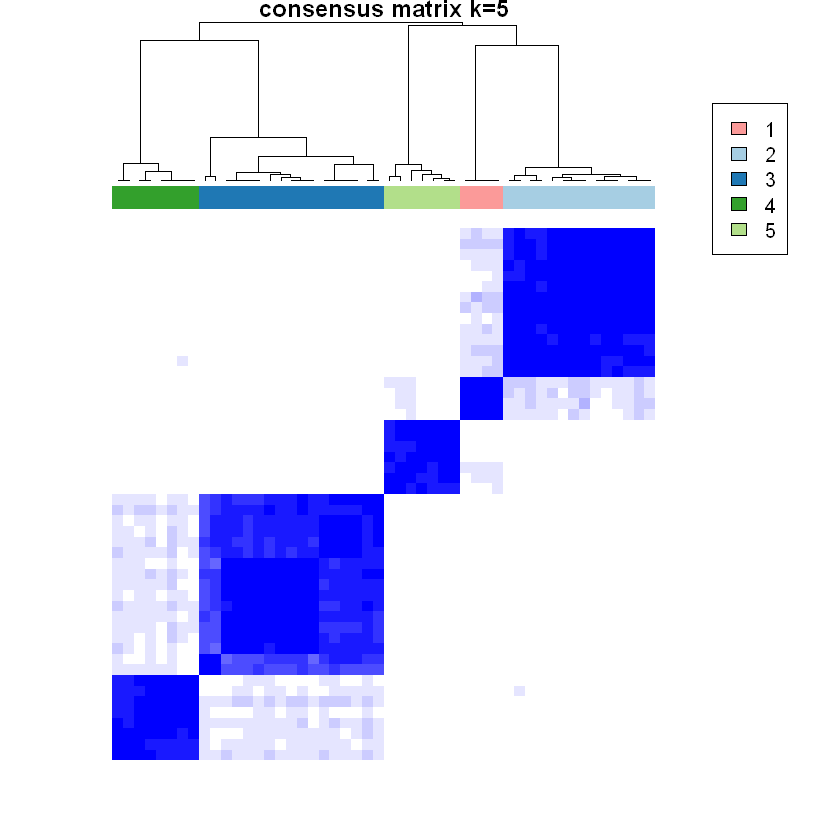

clustered



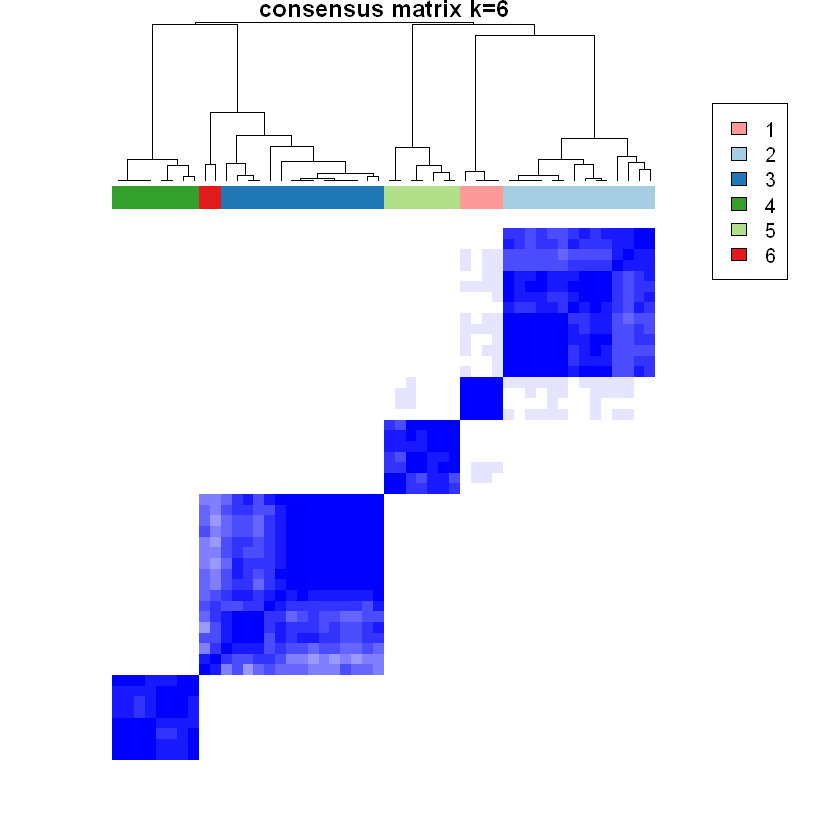

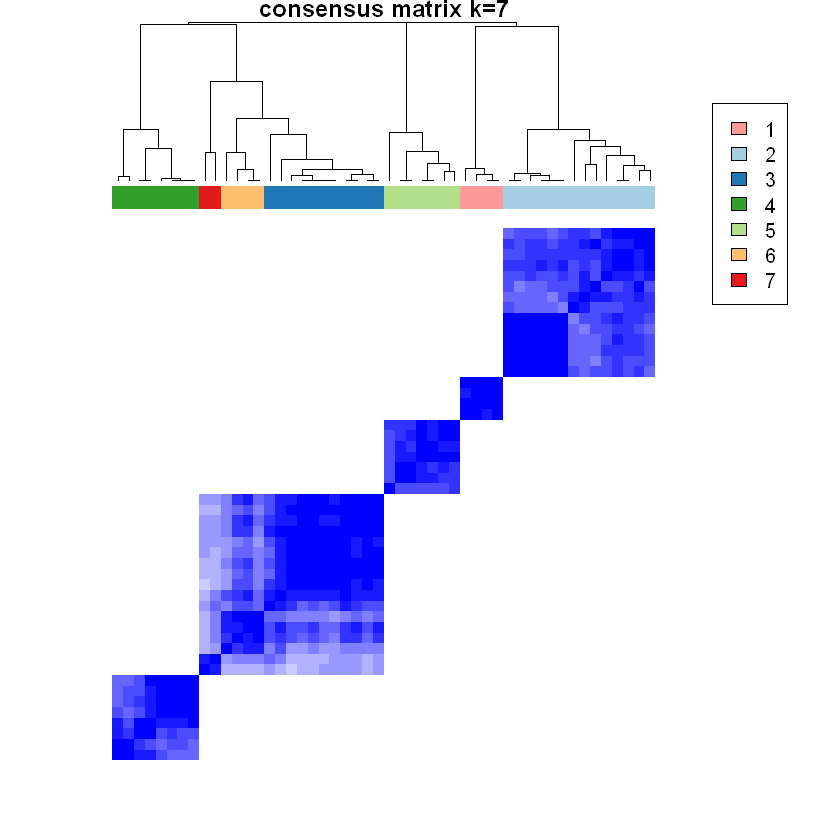

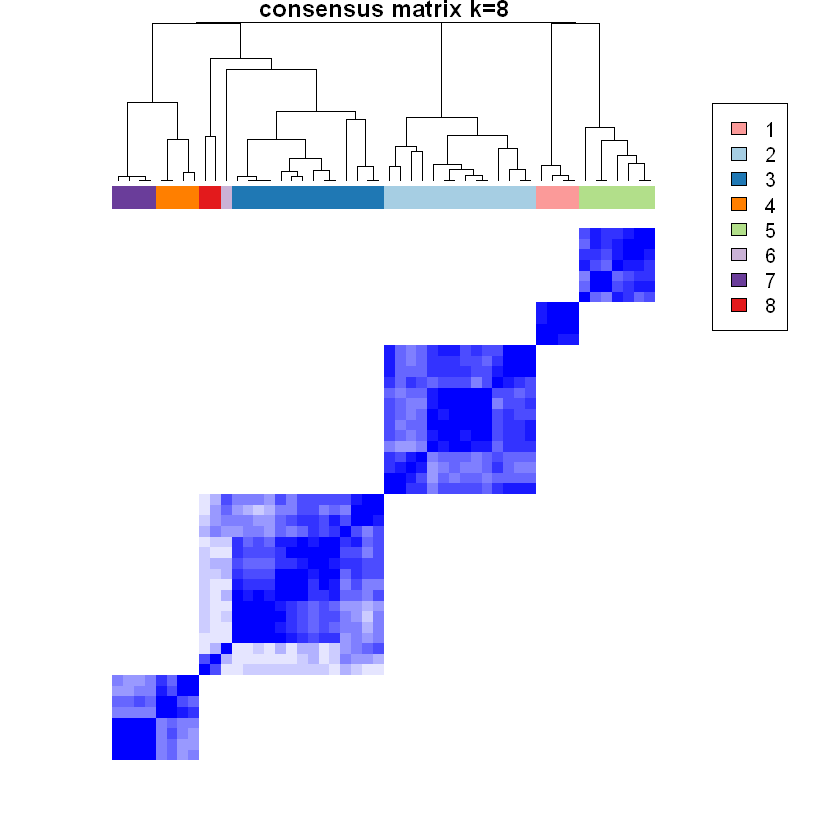

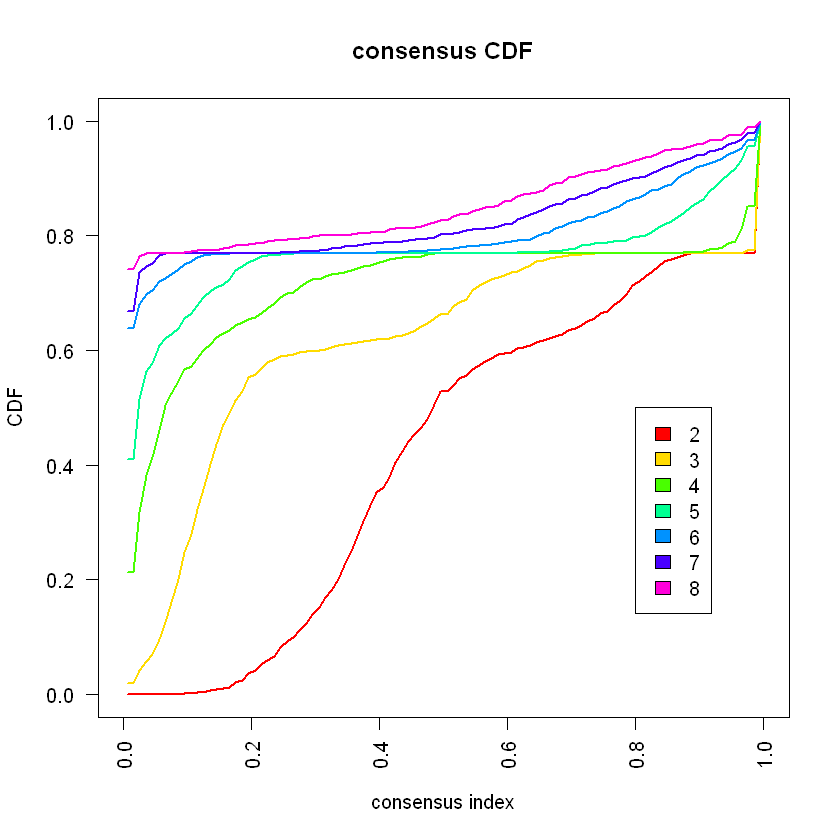

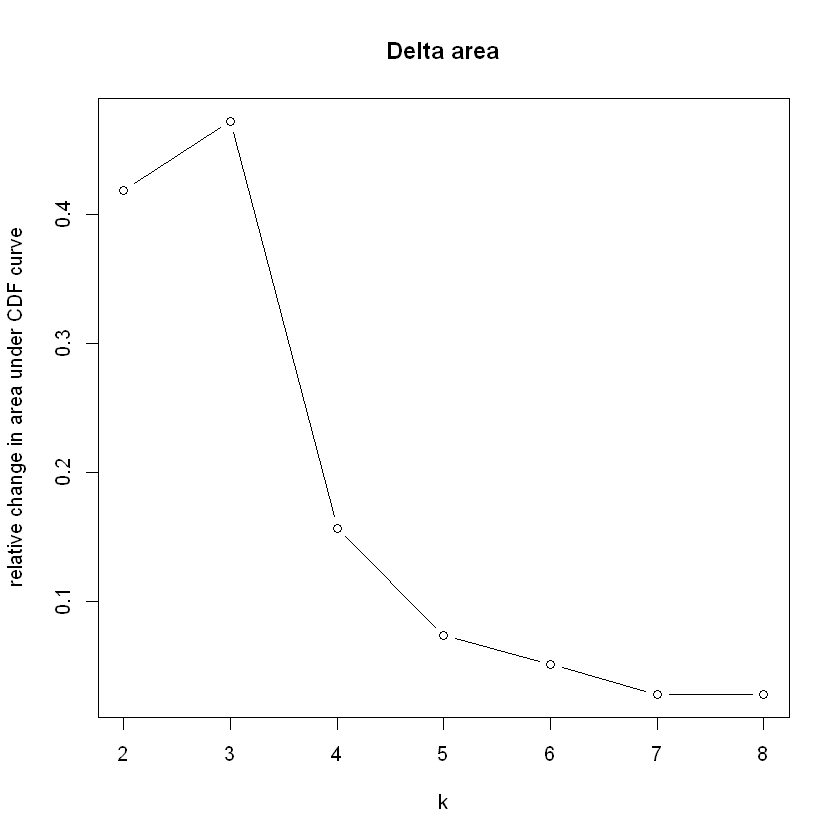

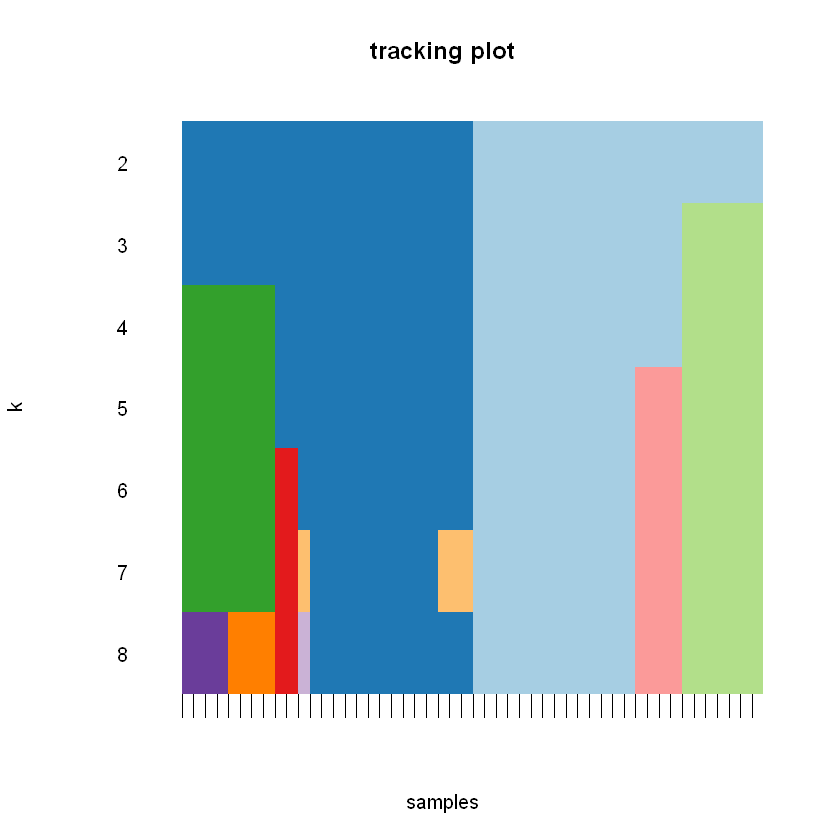

In [37]:
# ConsensusClusterPlus with kmeans



#BiocManager::install("ConsensusClusterPlus")
#browseVignettes("ConsensusClusterPlus")
# Cannot install directly to Rstudio depending on version - go via Bioconductor
library(ConsensusClusterPlus)
# this can be a bit slot depending on the number of features and observations!
ii<-sample(seq(1,801),50)
options(warn=-1)
cc<-ConsensusClusterPlus(as.matrix(t(data[ii,guse[1:500]])),maxK=8,reps=100,pItem=.6,pFeature=.6,
                         clusterAlg="km")

# This is consensus clustering using kmeans, with a maximum of 8 clusters. Default is eucliden distnance. 
options(warn=0)

Can see prominent elbow at k =5 - how promising!

In [38]:
# Do the consensus cluster overlap with the classes?

ccu<-cc[[3]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[5]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[6]]
mda::confusion(ccu$consensusClass,class[ii,])

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0   14    0
        2   17    0    0    0    8
        3    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   17    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   15    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0
        6    2    0    0    0    0

end fraction

clustered

clustered



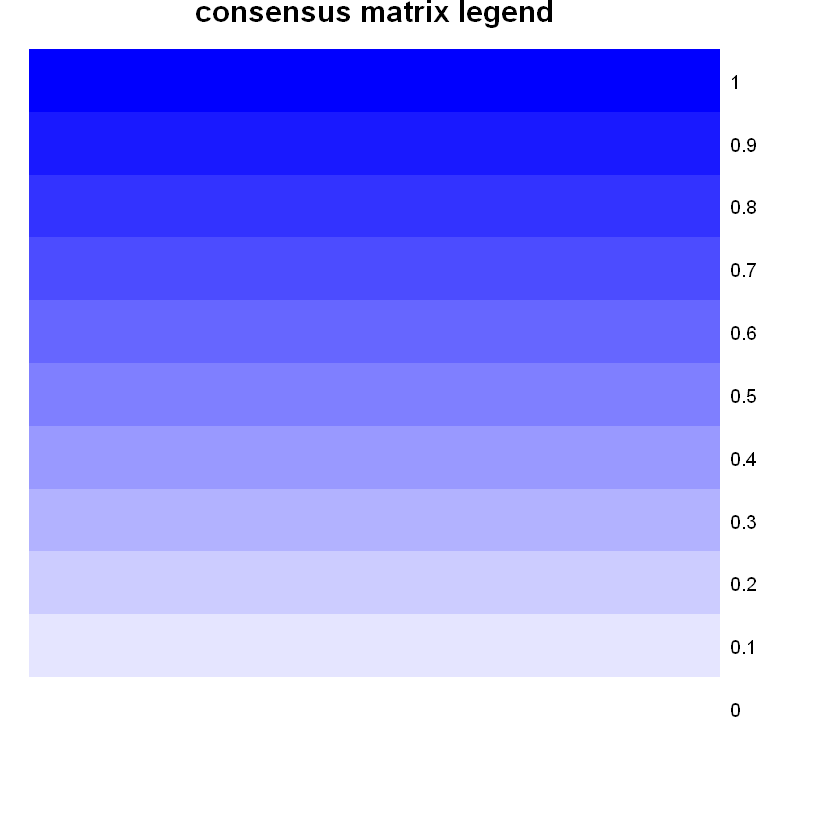

clustered



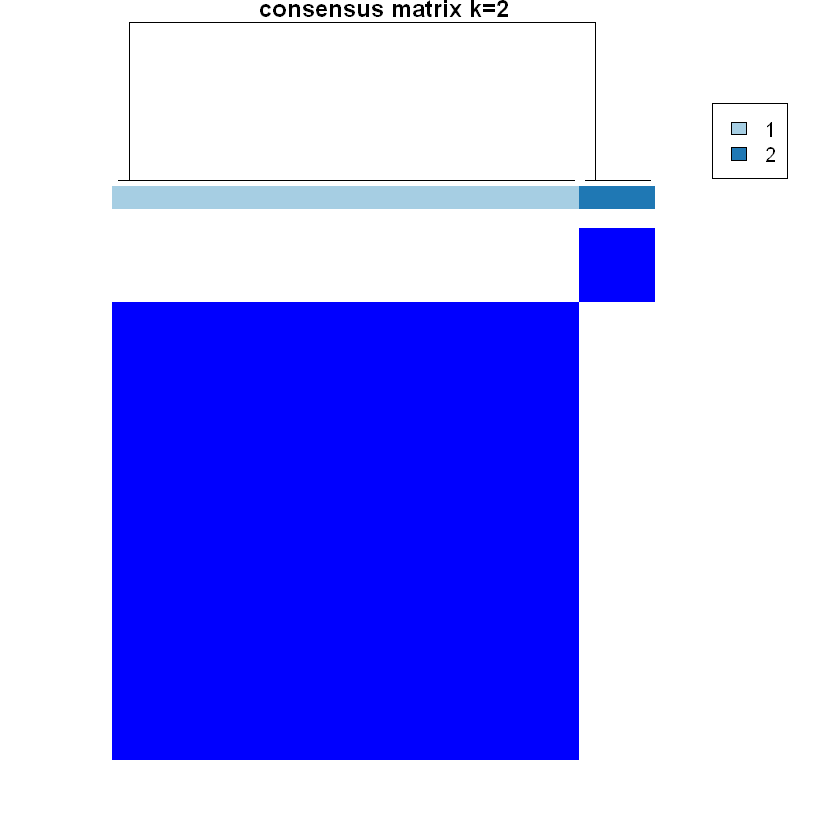

clustered



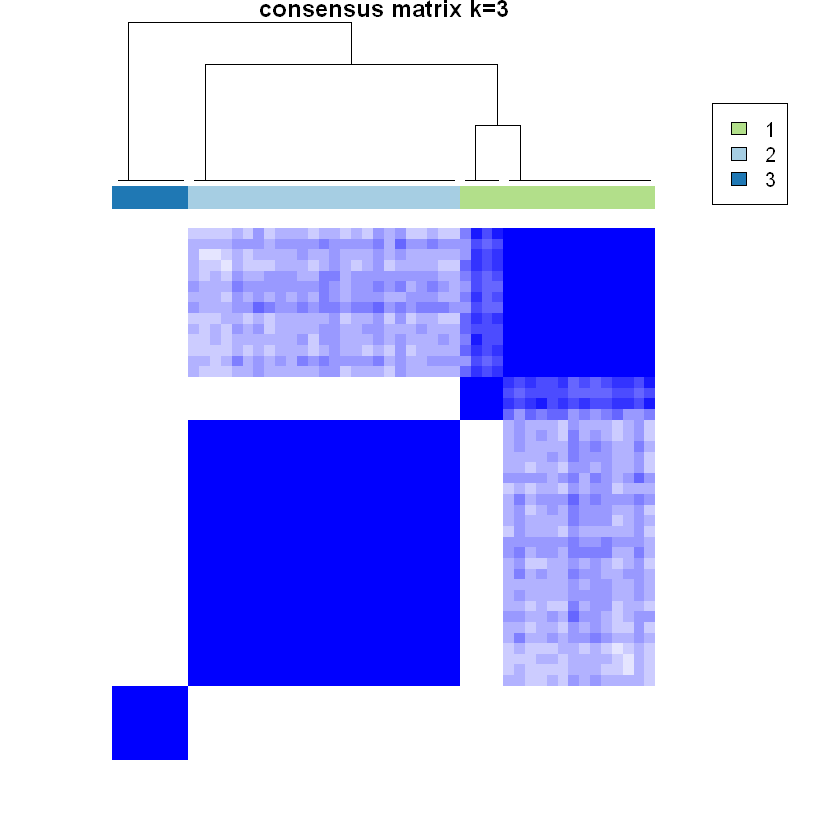

clustered



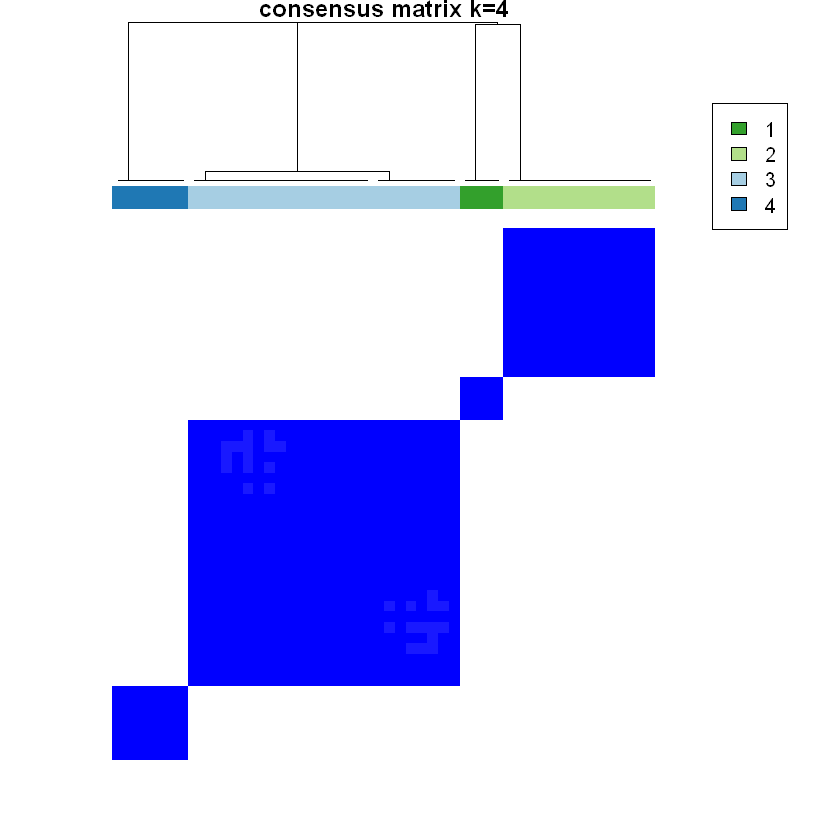

clustered



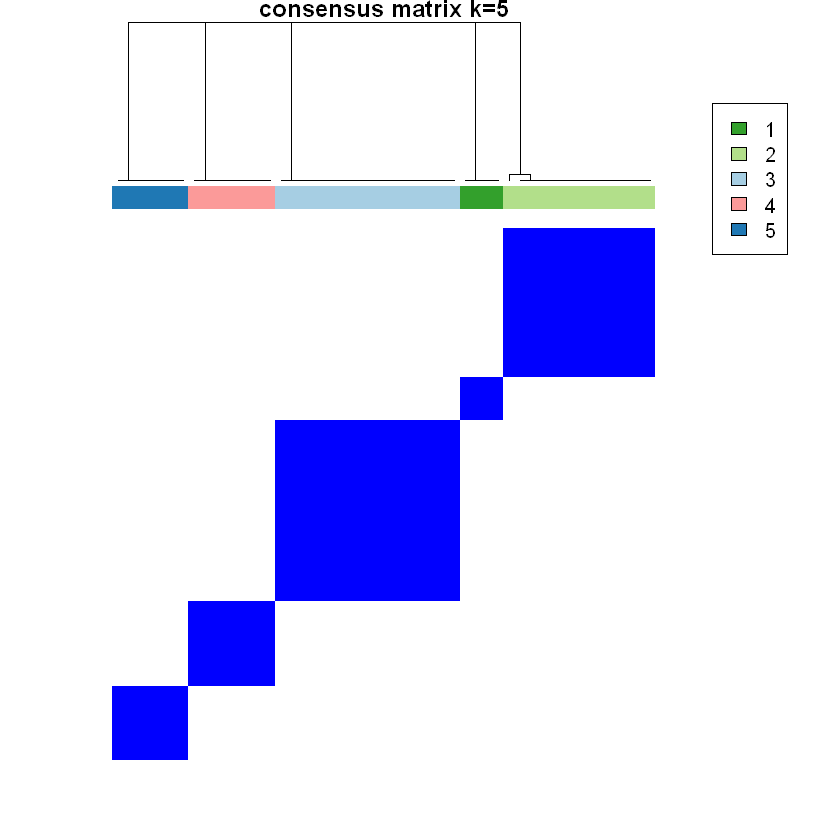

clustered



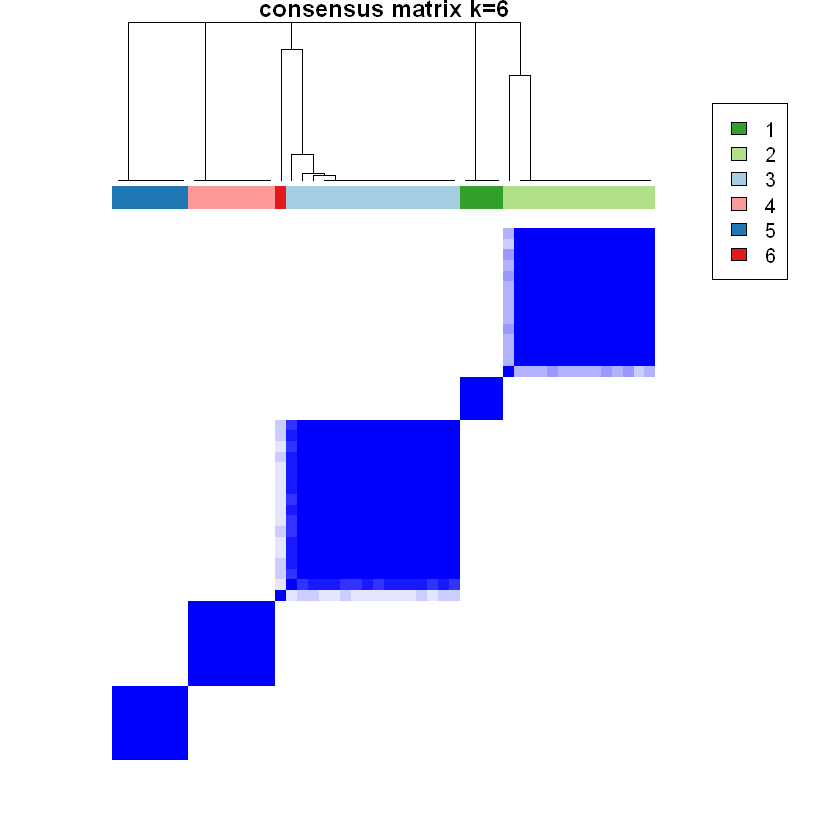

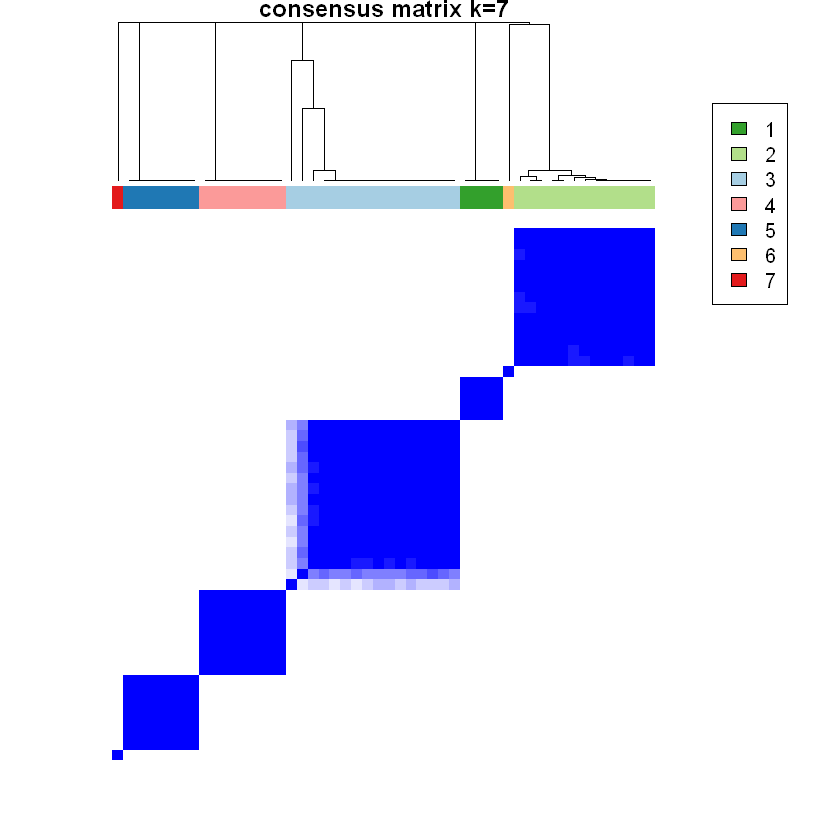

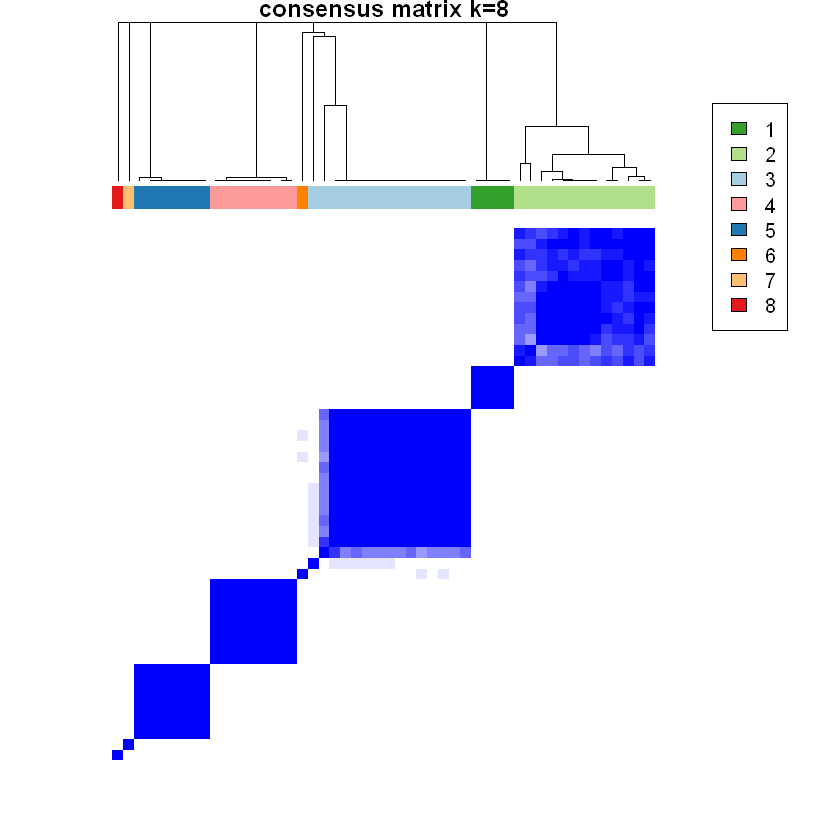

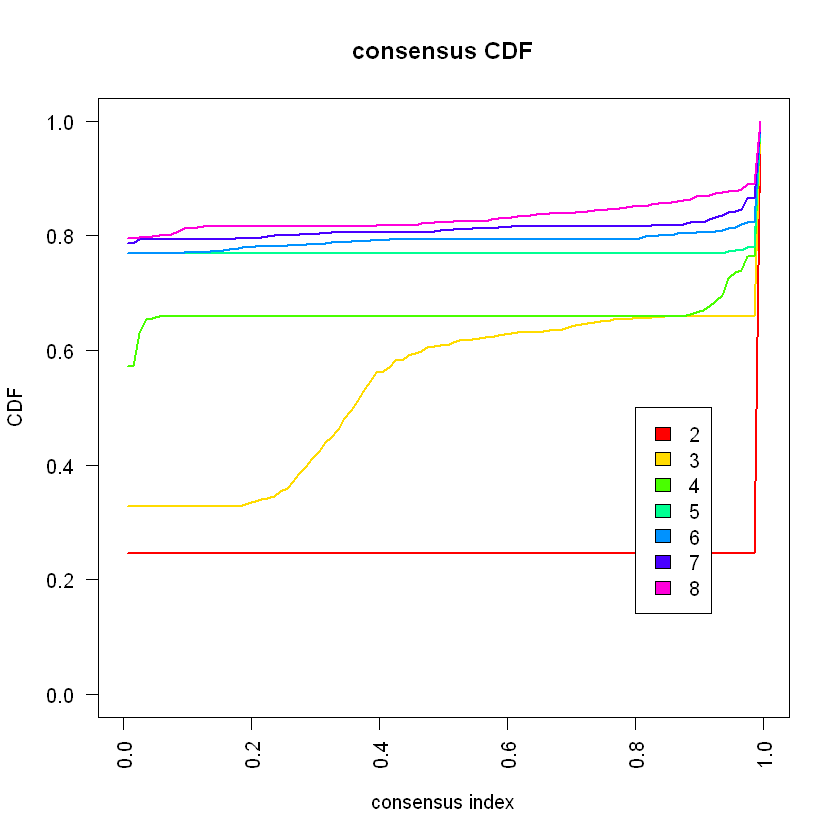

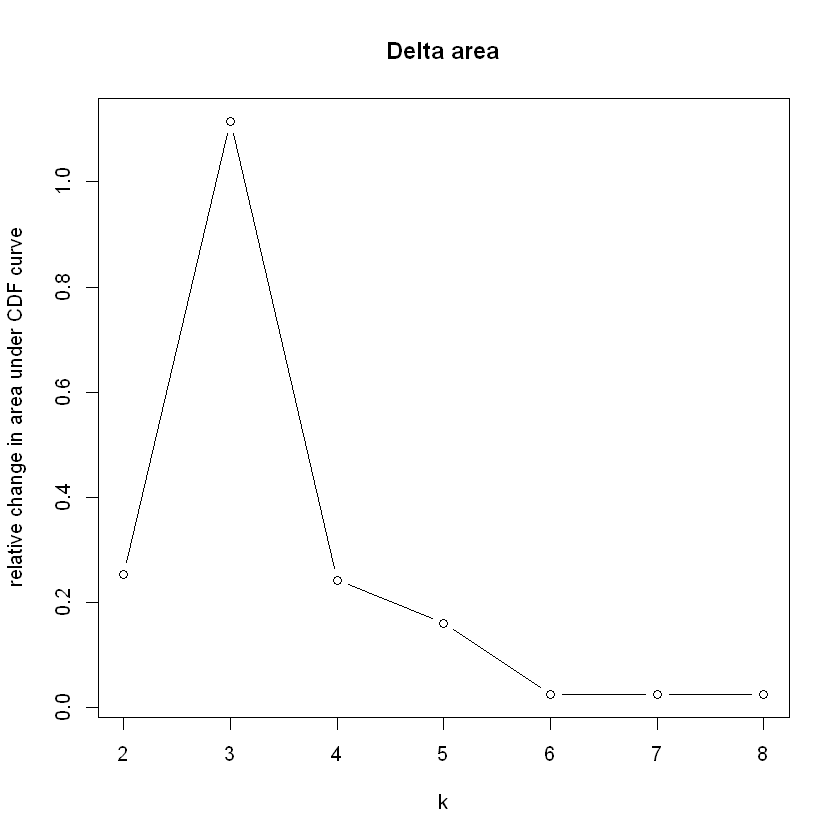

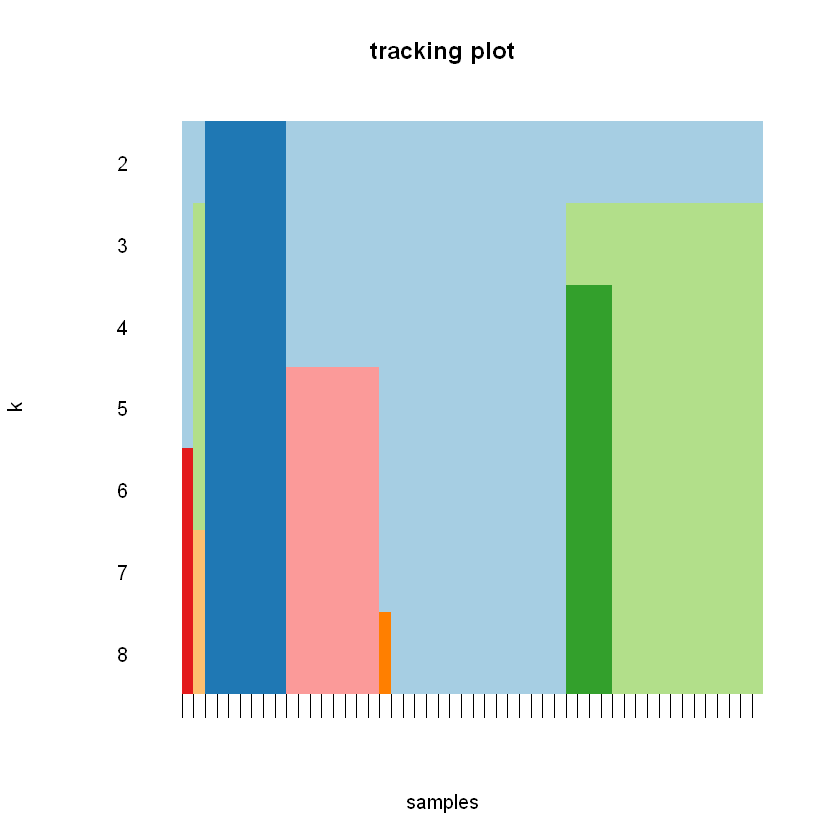

In [39]:
# ConsensusClusterPlus with hc


cc<-ConsensusClusterPlus(as.matrix(t(data[ii,guse[1:500]])),maxK=8,reps=100,pItem=.6,pFeature=.6,distance="pearson",clusterAlg="hc")

In [40]:
ccu<-cc[[3]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[5]]
mda::confusion(ccu$consensusClass,class[ii,])
ccu<-cc[[6]]
mda::confusion(ccu$consensusClass,class[ii,])

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0   14    0
        2   17    0    0    0    8
        3    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   17    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    4    0    0    0
        2    0    0    0   14    0
        3   16    0    0    0    0
        4    0    0    0    0    8
        5    0    0    7    0    0
        6    1    0    0    0    0

Seems like it likes 6 clusters here?

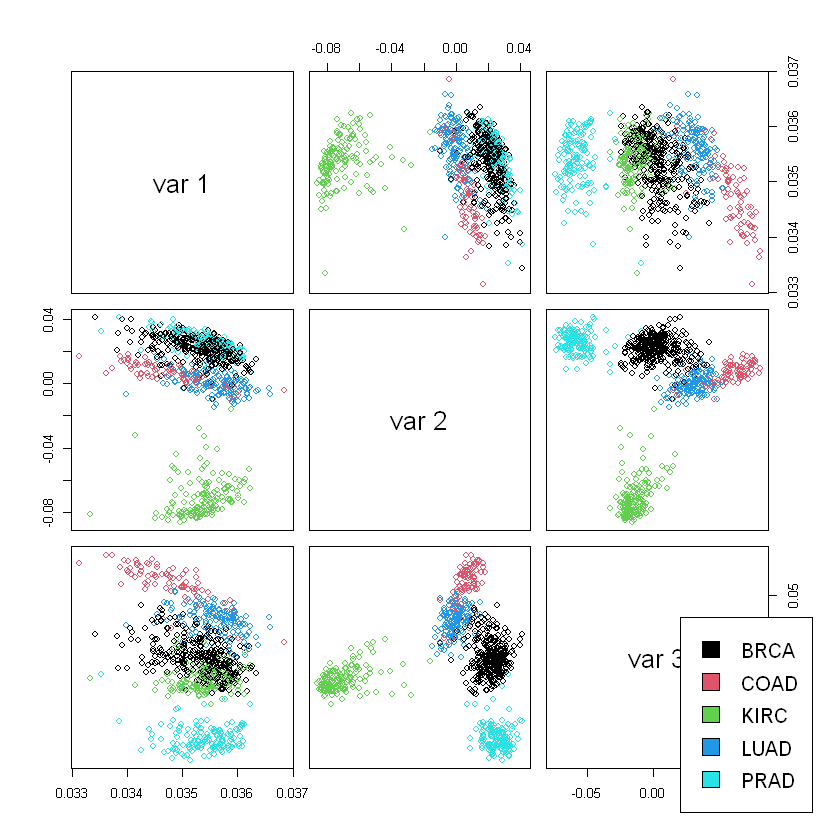

In [6]:
# Not really sure why I got mirrored result from above... 

ss<-irlba(as.matrix(data),10,10)
pairs(ss$u[,1:3],col=as.numeric(as.factor(class)))
par(xpd = TRUE)
legend("bottomright", fill = unique(as.factor(class))[sort.list(as.numeric(as.factor(unique(class))))], legend = c(levels(as.factor(class))))


Conducting Meinshausen & Buhlmann graph estimation (mb)....done


[1] "method"    "path"      "beta"      "lambda"    "sparsity"  "df"       
 [7] "sym"       "scr"       "cov.input" "data"

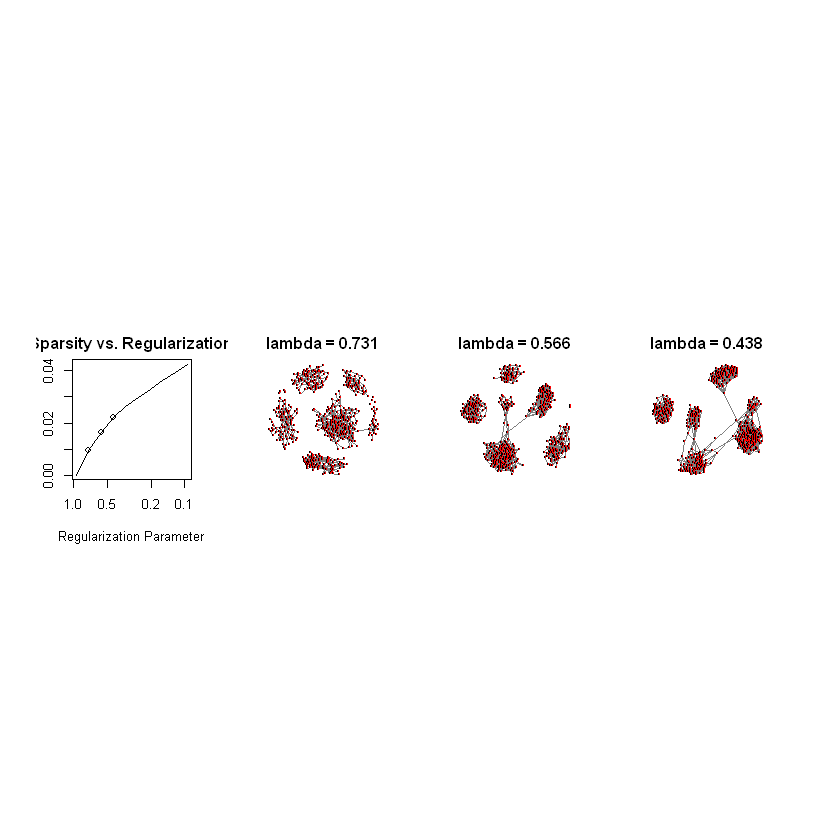

In [17]:
# Graphical Lasso
#install.packages("ElemStatLearn")
#install.packages("huge")
library(ElemStatLearn)
library(huge)
X <- data[,guse]
# The network modeling package using sparse gaussian graphical models 

# Huge = high-dimensional undirected graph estimation
# The main function for high-dimensional undirected graph estimation. 
# Three graph estimation methods, including
# (1) Meinshausen-Buhlmann graph estimation (mb) 
# (2) graphical lasso (glasso) 
# (3) correlation thresholding graph estimation (ct) and 
# (4) tuning-insensitive graph estimation (tiger),
# are available for data analysis.

its <- sample(seq(1,dim(data)[1]),500)
# select 400 digits at random
gg <- huge(t(X[its,]))
names(gg)
plot(gg)




Conducting Meinshausen & Buhlmann graph estimation (mb)....done


<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



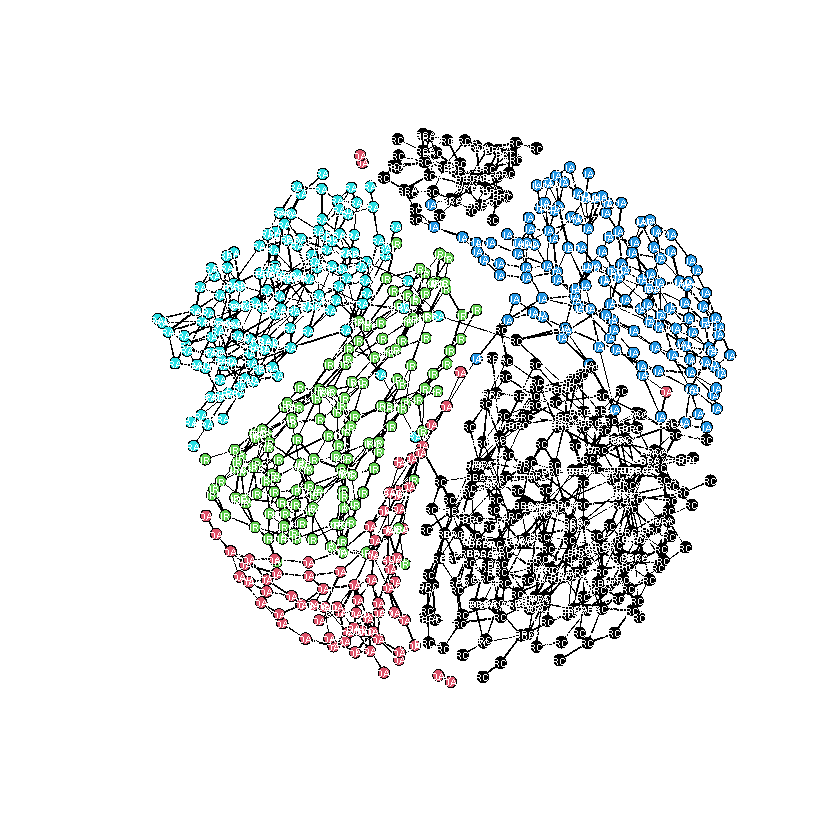

In [29]:
# Sort by top variance genes
library(irlba)
library(network)
library(huge)
library(ElemStatLearn)

ss<-irlba(as.matrix(X),nu=25,nv=25)

class <- as.matrix(labels)

# leading 100 PCs
g<-huge(t(ss$u))
plot.network(network(g$path[[3]]),usearrows=F,displayisolates=F,label=class,label.pos=5,label.col="white",label.cex=.5,vertex.col=as.numeric(as.factor(class)))

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



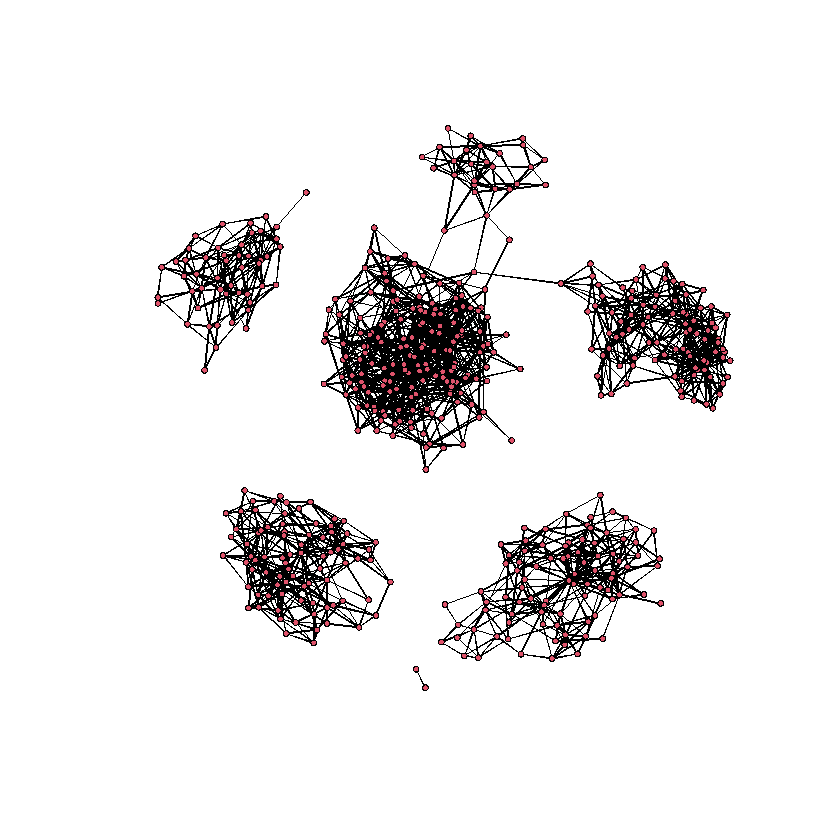

In [33]:
# network of genes instead

plot.network(network(gg$path[[3]]),vertex.cex=.5,usearrows=F,displayisolates=F)

In [ ]:
# Things left to do:
# Repeat stuff many times (I guess loop)
# Try more clustering methods
# Compute PAC scores and rank them for each cluster
# Interpret results
# Understand the underlying assumptions/the methods

# TASK 6